<a href="https://colab.research.google.com/github/sahintarkan/Data-Science/blob/main/Pandas_All_Recap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDAS RECAP

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### PANDAS BASICS

#### Pandas Series
pandas.Series(data=None, index=None, ...)

Tek boyutlu veri yapılarıdır

In [ ]:
labels  = ['a', 'b', 'c']
my_list = [10, 20, 30]
array_  = np.array([10, 20, 30])
d       = {'a': 10, 'b': 20, 'c': 30}

In [ ]:
pd.Series(my_list) # pd.Series(array_) # pd.Series(d)

0    10
1    20
2    30
dtype: int64

In [ ]:
pd.Series(data = array_, index=labels)

a    10
b    20
c    30
dtype: int32

In [ ]:
pd.Series(data=["element1","element2"])

0    element1
1    element2
dtype: object

In [ ]:
pd.Series(data="element", index= range(5))

0    element
1    element
2    element
3    element
4    element
dtype: object

In [ ]:
ser = pd.Series(["ahmet", 5 , True, 5.8])
ser.dtype

dtype('O')

#### Pandas DataFrames

pandas.DataFrame()  , series.to_frame()

Tablo şeklinde çok sütunlu veri yapıları

In [ ]:
df1 = pd.DataFrame(ser)   # pd.DataFrame(my_list) #  pd.DataFrame(array_) # pd.DataFrame(d)
type(df1)

pandas.core.frame.DataFrame

In [ ]:
df2 = ser.to_frame()
type(df2)

pandas.core.frame.DataFrame

In [ ]:
list1 = [1, 3, "a", 7, 9]
array1 = np.arange(1,24,2).reshape(3,4)
dict1 = {"var1":[1,2.2], "var2":[3,4], "var3":[5,6]}

In [ ]:
pd.DataFrame(list1)

,0
0,1
1,3
2,a
3,7
4,9


In [ ]:
pd.DataFrame(array1)

,0,1,2,3
0,1,3,5,7
1,9,11,13,15
2,17,19,21,23


In [ ]:
pd.DataFrame(dict1)

,var1,var2,var3
0,1.0,3,5
1,2.2,4,6


###### Some attributes of Pandas DataFrame

In [ ]:
df = pd.DataFrame({"var1":[1,"a",4.5,5,6,7,True],"var2":[1,2.5, 2,2.6,10,4.8,7],"var3":[2.5,3.2,4.8,5.7,7.6,8.3,9.5],
                   "var4":[21,22,23,24,25,26,27],"var5":[True, False, False, True, True, False, True], 
                   "var6":["John","Jack","Melinda","Sandra","Leonardo","Lena","Arthur"]},
                   index = ["a","b",2,"d",5.5,"6",True])
df

,var1,var2,var3,var4,var5,var6
a,1,1.0,2.5,21,True,John
b,a,2.5,3.2,22,False,Jack
2,4.5,2.0,4.8,23,False,Melinda
d,5,2.6,5.7,24,True,Sandra
5.5,6,10.0,7.6,25,True,Leonardo
6,7,4.8,8.3,26,False,Lena
True,True,7.0,9.5,27,True,Arthur


In [ ]:
df.info()
# df.head()
# df.tail()
# df.sample(2)
# df.index
# df.columns
# df["var1"]
# df.columns = ["new1", "new2", "new3","new4", "new5", "new6"]
# df.index   = ["a", "b", "c", "d","e","f","g"]
# df.rename(columns = {"new1":"aaa", "new2":"bbb"})
# df.rename(index = {1:"a", 2:"b"}, inplace=True)
# df.shape
# df.size
# df.ndim
# df.values
# df.dtypes
# df["var1"].value_counts()
# df["var1"].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, a to True
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    7 non-null      object 
 1   var2    7 non-null      float64
 2   var3    7 non-null      float64
 3   var4    7 non-null      int64  
 4   var5    7 non-null      bool   
 5   var6    7 non-null      object 
dtypes: bool(1), float64(2), int64(1), object(2)
memory usage: 343.0+ bytes


##### Indexing, Slicing & Selection

In [ ]:
from numpy.random import randn
df = pd.DataFrame(randn(5, 4), index = 'A B C D E'.split(), columns = 'W X Y Z'.split())
df

,W,X,Y,Z
A,0.337080,-0.950286,-0.202146,-1.533382
B,0.557993,-0.060379,-0.667551,0.015456
C,-0.434050,-0.222327,-2.125566,-2.501308
D,0.482627,0.075776,2.684830,0.418298
E,-0.111065,-0.582703,0.626998,0.401063


In [ ]:
# df["A"]                 # HATA  # .loc kullanmadan indexlerde bu şekilde çıktı alamıyoruz
# df["Y"]                 # dtype: Series    # Also: df.Y
# df[["Y"]]               # dtype: DataFrame
#df[["A","C"]]           # HATA  # .loc kullanmadan indexlerde bu şekilde çıktı alamıyoruz
df[["X", "Y"]]          # dtype: DataFrame
#df[1:3][['W', 'Y']]       # dtype: DataFrame  # Dikkat!: D dahil değil
# df["B":"D"][['W', 'Y']] # dtype: DataFrame  # Dikkat!: "D" dahil     # also: df[['W', 'Y']]["B":"D"]

##### Creating a New Column

In [ ]:
df["new1"] = df["W"] * df["X"]
df["new2"] = np.arange(5)
df

,W,X,Y,Z,new1,new2
A,-0.085447,0.889068,1.322141,-1.054706,-0.075968,0
B,-0.673976,-1.695707,0.317709,-0.293604,1.142866,1
C,-1.057357,0.245693,-0.282496,1.358318,-0.259785,2
D,-0.692295,-0.234705,0.593594,-0.269769,0.162485,3
E,0.249910,-0.020141,0.266774,0.148755,-0.005033,4


##### Removing Columns

In [ ]:
df.drop("new2", axis=1)           # inplace = True,  / axis=0 default

,W,X,Y,Z,new1
A,-0.085447,0.889068,1.322141,-1.054706,-0.075968
B,-0.673976,-1.695707,0.317709,-0.293604,1.142866
C,-1.057357,0.245693,-0.282496,1.358318,-0.259785
D,-0.692295,-0.234705,0.593594,-0.269769,0.162485
E,0.249910,-0.020141,0.266774,0.148755,-0.005033


In [ ]:
df.drop(["new1","new2"], axis=1)   # inplace = True / axis=0 default

,W,X,Y,Z
A,-0.085447,0.889068,1.322141,-1.054706
B,-0.673976,-1.695707,0.317709,-0.293604
C,-1.057357,0.245693,-0.282496,1.358318
D,-0.692295,-0.234705,0.593594,-0.269769
E,0.249910,-0.020141,0.266774,0.148755


#### Removing Rows

In [ ]:
df.drop("C", axis=0)     # inplace = True

,W,X,Y,Z,new1,new2
A,-0.085447,0.889068,1.322141,-1.054706,-0.075968,0
B,-0.673976,-1.695707,0.317709,-0.293604,1.142866,1
D,-0.692295,-0.234705,0.593594,-0.269769,0.162485,3
E,0.249910,-0.020141,0.266774,0.148755,-0.005033,4


In [ ]:
df.drop(["B", "D"])      # inplace = True

,W,X,Y,Z,new1,new2
A,-0.085447,0.889068,1.322141,-1.054706,-0.075968,0
C,-1.057357,0.245693,-0.282496,1.358318,-0.259785,2
E,0.249910,-0.020141,0.266774,0.148755,-0.005033,4


##### .loc[ ] and .iloc[ ] - Selecting Rows and Column

loc : 1."index/sütun isimleri", 2.indexlemede "dahil" eder

iloc: 1.integer değerler      , 2.indexlemede "dahil" etmez(_e kadar)

.loc[] → allows us to select data using labels (names) of rows (index) & columns

.iloc[] → allows us to select data using index numbers of rows (index) & columns. it's like classical indexing logic

In [ ]:
data = np.random.randint(1, 40, size=(8, 4))
df = pd.DataFrame(data,index = 'A B C D E F G H'.split(), columns = ["var1", "var2", "var3", 'var4'])
df

,var1,var2,var3,var4
A,4,13,21,27
B,5,15,7,4
C,16,15,28,27
D,14,35,18,33
E,24,6,22,17
F,9,10,23,17
G,29,17,22,30
H,12,37,18,30


In [ ]:
# df.loc["D":"G","var2"]                # dtype: Series
# df.loc["D":"G"]["var2"]               # dtype: Series
# df.loc["D":"G"][["var2"]]             # dtype: DataFrame
# df.loc["D":"G",["var2"]]              # dtype: DataFrame
df.loc["D":"G","var2":"var3"]           # dtype: DataFrame
#df.loc["D":"G"][["var2","var3"]]       # dtype: DataFrame  # Dikkat! : "G" indexini dahil ettik
# df.loc["A","var1"]                    # dtype: Series
# df.loc[["A"],["var1"]]                # dtype: DataFrame
# df.loc[["A","C"],["var1","var3"]]     # dtype: DataFrame  # A and C indexes, var1 and var3 columns
# df.loc["A":"D"]                       # dtype: DataFrame
# NOT: indexler nümerik ise .loc kullanırken indexler için nümerik değer kullanabiliriz
    # df.reset_index(inplace=True)
    # df.loc[2,["var2","var3"]]

,var2,var3
D,35,18
E,6,22
F,10,23
G,17,22


In [ ]:
# df.iloc[2:5]               # dtype: DataFrame #  Dikkat! : 5. sütun dahil değil
# df.iloc[2:5,2]             # dtype: Series
# df.iloc[2:5,[2]]           # dtype: DataFrame
# df.iloc[1:5][[2]]          # HATA.  Burada 2 iloc parantezinin dışında kaldığı için sütun "ismi" yazılmalı
# df.iloc[1:5][["var2"]]     # dtype: DataFrame
df.iloc[1:3,2:4]           # dtype: DataFrame
# df.iloc[3,2])              # dtype: numpy.int32. Tek değer olduğunda veri tipi numpy olarak dönüyor

,var3,var4
B,7,4
C,28,27


##### Conditional Selection

In [ ]:
df["var1"]>10                        # dtype: Boolean

A    False
B    False
C     True
D     True
E     True
F    False
G     True
H     True
Name: var1, dtype: bool

In [ ]:
df[df["var1"]>10]                    # dtype: DataFrame

,var1,var2,var3,var4
C,16,15,28,27
D,14,35,18,33
E,24,6,22,17
G,29,17,22,30
H,12,37,18,30


In [ ]:
df[df["var1"]>10][["var2", "var3"]]  # dtype: DataFrame

,var2,var3
C,15,28
D,35,18
E,6,22
G,17,22
H,37,18


##### Two or More Conditional Statements

df[ () & () ], df[ () | () ]

In [ ]:
(df["var1"]>10) & (df["var2"]<20)  # (df["var1"]>10) | (df["var2"]<20)

A    False
B    False
C     True
D    False
E     True
F    False
G     True
H    False
dtype: bool

In [ ]:
df[(df["var1"]>10) & (df["var2"]<20)]   # df[(df["var1"]>10) & (df["var2"]<20)][["var2","var3"]]

,var1,var2,var3,var4
C,16,15,28,27
E,24,6,22,17
G,29,17,22,30


##### Conditional Selection Using .loc[ ] 

In [ ]:
df.loc[((df["var1"] < 10) | (df["var1"] > 30)), ['var2','var3']]  # 2 condition

,var2,var3
A,13,21
B,15,7
F,10,23


##### reset_index() & set_index()

In [ ]:
df         # df.index

,var1,var2,var3,var4
A,4,13,21,27
B,5,15,7,4
C,16,15,28,27
D,14,35,18,33
E,24,6,22,17
F,9,10,23,17
G,29,17,22,30
H,12,37,18,30


In [ ]:
df.reset_index()

,index,var1,var2,var3,var4
0,A,4,13,21,27
1,B,5,15,7,4
2,C,16,15,28,27
3,D,14,35,18,33
4,E,24,6,22,17
5,F,9,10,23,17
6,G,29,17,22,30
7,H,12,37,18,30


In [ ]:
df.reset_index(drop = True)   # inplace=True

,var1,var2,var3,var4
0,4,13,21,27
1,5,15,7,4
2,16,15,28,27
3,14,35,18,33
4,24,6,22,17
5,9,10,23,17
6,29,17,22,30
7,12,37,18,30


In [ ]:
df.set_index("var4")          # inplace=True

,var1,var2,var3
var4,,,
27,4,13,21
4,5,15,7
27,16,15,28
33,14,35,18
17,24,6,22
17,9,10,23
30,29,17,22
30,12,37,18


##### Multi-Index & Index Hierarchy

In [ ]:
outside = ['M1', 'M1', 'M1', 'M2', 'M2', 'M2','M3', 'M3', 'M3']
inside = [1, 2, 3, 1, 2, 3, 5, 6, 7]
multi_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(multi_index)   # Tuple dan multiindex dtype ına çevirdi

In [ ]:
multi_index       # dtype: list

[('M1', 1),
 ('M1', 2),
 ('M1', 3),
 ('M2', 1),
 ('M2', 2),
 ('M2', 3),
 ('M3', 5),
 ('M3', 6),
 ('M3', 7)]

In [ ]:
hier_index       # dtype: pandas.....MultiIndex

MultiIndex([('M1', 1),
            ('M1', 2),
            ('M1', 3),
            ('M2', 1),
            ('M2', 2),
            ('M2', 3),
            ('M3', 5),
            ('M3', 6),
            ('M3', 7)],
           )

In [ ]:
np.random.seed(101)
df = pd.DataFrame(np.random.randn(9, 4), index = hier_index, columns=['A', 'B', 'C', 'D']) # Bunları normalde groupby vs ile yapacağız
df

A         B         C         D
M1 1  2.706850  0.628133  0.907969  0.503826
   2  0.651118 -0.319318 -0.848077  0.605965
   3 -2.018168  0.740122  0.528813 -0.589001
M2 1  0.188695 -0.758872 -0.933237  0.955057
   2  0.190794  1.978757  2.605967  0.683509
   3  0.302665  1.693723 -1.706086 -1.159119
M3 5 -0.134841  0.390528  0.166905  0.184502
   6  0.807706  0.072960  0.638787  0.329646
   7 -0.497104 -0.754070 -0.943406  0.484752

In [ ]:
df.index.names = ["Group","Num"]
df

A         B         C         D
Group Num                                        
M1    1    2.706850  0.628133  0.907969  0.503826
      2    0.651118 -0.319318 -0.848077  0.605965
      3   -2.018168  0.740122  0.528813 -0.589001
M2    1    0.188695 -0.758872 -0.933237  0.955057
      2    0.190794  1.978757  2.605967  0.683509
      3    0.302665  1.693723 -1.706086 -1.159119
M3    5   -0.134841  0.390528  0.166905  0.184502
      6    0.807706  0.072960  0.638787  0.329646
      7   -0.497104 -0.754070 -0.943406  0.484752

In [ ]:
df.index.levels[1]            # dtype: numeric.Int64Index  # df.index.levels[0] , df.index.levels[-1]

Int64Index([1, 2, 3, 5, 6, 7], dtype='int64', name='Num')

In [ ]:
df.index.get_level_values(0)          # dtype: base.Index  
# df.index.get_level_values("Group")  # df.index.get_level_values(0)[6] --> M3

Index(['M1', 'M1', 'M1', 'M2', 'M2', 'M2', 'M3', 'M3', 'M3'], dtype='object', name='Group')

In [ ]:
# df.loc["M1"]
# df.loc["M1"]
# df.loc[("M1",2)]
df.loc[[("M1",2)]]
# df.loc["M1","A":"C"]
# df.loc["M1":"M2"]
# df.loc[("M1",2):("M2",1)]
# df.loc["M1":"M2":2]
# df.loc[[("M2",3), ("M3",5)]]

,,A,B,C,D
Group,Num,,,,
M1,2,0.651118,-0.319318,-0.848077,0.605965


#### Some Useful Functions

DataFrame.groupby()

DataFrame.agg()  /  DataFrame.aggregate()

DataFrame.groupby().agg()
****************************************
DataFrame.filter()

DataFrame.groupby().filter()
*****************************************
DataFrame.transform()

DataFrame.groupby().transform()
*****************************************
Series.apply()

DataFrame.apply()

DataFrame.applymap()

Series.map()

##### DataFrame.groupby()
Aggregation fonksiyonları ile kullanır

count(), mean(), median(), min(), max(), std(), var(), sum(), idxmin(), idxmax(), corr(), describe()

In [ ]:
data = {'Company':['GOOG', 'GOOG', 'MSFT', 'MSFT', 'GOOG', 'MSFT', 'GOOG', 'MSFT'],
        'Department':['HR', 'IT', 'IT', 'HR', 'HR', 'IT', 'IT', 'HR'],
        'Person':['Sam', 'Charlie', 'Amy', 'Vanessa', 'Carl', 'Sarah', 'Tom', 'Terry'],
        'Age':[30, 28, 35, 40, 42, 25, 32, 48],
        'Sales':[200, 120, 340, 124, 243, 350, 180, 220]}
df1 = pd.DataFrame(data)
df1

,Company,Department,Person,Age,Sales
0,GOOG,HR,Sam,30,200
1,GOOG,IT,Charlie,28,120
2,MSFT,IT,Amy,35,340
3,MSFT,HR,Vanessa,40,124
4,GOOG,HR,Carl,42,243
5,MSFT,IT,Sarah,25,350
6,GOOG,IT,Tom,32,180
7,MSFT,HR,Terry,48,220


In [ ]:
df1.groupby('Company')           # Aggregation fonksiyonu ile kullanmalıydık

In [ ]:
df1.groupby('Company').mean() 

,Age,Sales
Company,,
GOOG,33.0,185.75
MSFT,37.0,258.50


In [ ]:
df1.groupby('Company')[['Sales']].mean()     # Dataframe  # df1.groupby('Company')['Sales'].mean() --> Series

,Sales
Company,
GOOG,185.75
MSFT,258.50


In [ ]:
df1.groupby(['Company','Department'])[['Age','Sales']].mean()

Age  Sales
Company Department             
GOOG    HR          36.0  221.5
        IT          30.0  150.0
MSFT    HR          44.0  172.0
        IT          30.0  345.0

##### DataFrame.agg()

In [ ]:
df2 = pd.DataFrame({'groups': ['A', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'C'],
                   'var1': [10, 23, 33, 22, 11, 99, 76, 84, 45],
                   'var2': [100, 253, 333, 262, 111, 969, 405, 578, 760]})
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [ ]:
df2.agg(['sum','min'])     # also: df2.agg([sum, min])

,groups,var1,var2
sum,ABCABCABC,403,3771
min,A,10,100


In [ ]:
df2.agg([sum,min])[['var1','var2']]   # df2[['var1','var2']].agg([sum,min])

,var1,var2
sum,403,3771
min,10,100


###### DataFrame.groupby().agg()

In [ ]:
df2.groupby('groups').agg({min,'median',max})
# df2.groupby('groups').agg({np.min,np.median,np.max})   # Note for Output: amin : array min , amin: array max 

var1            var2            
        max min median  max  min median
groups                                 
A        76  10   22.0  405  100  262.0
B        84  11   23.0  578  111  253.0
C        99  33   45.0  969  333  760.0

In [ ]:
df2.groupby('groups').agg({'var1':(min,'max'),'var2':['median',np.mean]})
# df2.groupby("groups")[["var1", "var2"]].agg([min, max])

var1       var2            
        min max median        mean
groups                            
A        10  76  262.0  255.666667
B        11  84  253.0  314.000000
C        33  99  760.0  687.333333

##### DataFrame.filter()

Sütun isimlerine ve index isimlerine göre filtreleme yapıyor

Diğerlerinin yapamadığı ve filter ın yaptığı 2 şey, (1.regex ve 2.like)

In [ ]:
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [ ]:
df2.filter(["var1","var2"])  # df2.filter([0,3], axis=0)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [ ]:
df2.filter(regex="^va", axis=1)  # df2.filter(regex='r2$', axis=1)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [ ]:
df2.filter(like="ou", axis=1)

,groups
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


##### DataFrame.groupby().filter()

In [ ]:
def filter_func(x):
    return x['var1'].mean() > 39
df2.groupby('groups').filter(filter_func)

,groups,var1,var2
1,B,23,253
2,C,33,333
4,B,11,111
5,C,99,969
7,B,84,578
8,C,45,760


In [ ]:
df2.groupby("groups").filter(lambda x: x["var2"].sum() < 800)

,groups,var1,var2
0,A,10,100
3,A,22,262
6,A,76,405


##### DataFrame.transform()

Transform bizim vereceğimiz fonksiyona göre bir dönüşüm sağlar. 

Dönüşümün sonunda df ile AYNI UZUNLUKTA bir df sonuç oluşturur.(seri ise seri)

Transform aggregate sonucunu DataFrame.transform() da döndürmez

In [ ]:
df_num = df2.iloc[:,1:3]
df_num

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


In [ ]:
df2.apply(lambda x: x.sum())   # df_num.transform(lambda x : x.sum()) # HATA

groups    ABCABCABC
var1            403
var2           3771
dtype: object

In [ ]:
df_num.transform(lambda x : x+10)

,var1,var2
0,20,110
1,33,263
2,43,343
3,32,272
4,21,121
5,109,979
6,86,415
7,94,588
8,55,770


In [ ]:
df_num.var1.transform([np.sqrt,np.exp])  # NOT: np.exp == e ** x : 2.718281 ** 10 = 22026.398664167056

,sqrt,exp
0,3.162278,2.202647e+04
1,4.795832,9.744803e+09
2,5.744563,2.146436e+14
3,4.690416,3.584913e+09
4,3.316625,5.987414e+04
5,9.949874,9.889030e+42
6,8.717798,1.014800e+33
7,9.165151,3.025077e+36
8,6.708204,3.493427e+19


In [ ]:
df2["transformed_new"] = df_num.var1.transform([np.sqrt])
df2

,groups,var1,var2,transformed_new
0,A,10,100,3.162278
1,B,23,253,4.795832
2,C,33,333,5.744563
3,A,22,262,4.690416
4,B,11,111,3.316625
5,C,99,969,9.949874
6,A,76,405,8.717798
7,B,84,578,9.165151
8,C,45,760,6.708204


##### DataFrame.groupby().transform()

Transform bizim vereceğimiz fonksiyona göre bir dönüşüm sağlar. Bu dönüşümün sonunda df ile AYNI UZUNLUKTA bir df sonuç oluşturur.(seri ise seri)

In [ ]:
df2

,groups,var1,var2,transformed_new
0,A,10,100,3.162278
1,B,23,253,4.795832
2,C,33,333,5.744563
3,A,22,262,4.690416
4,B,11,111,3.316625
5,C,99,969,9.949874
6,A,76,405,8.717798
7,B,84,578,9.165151
8,C,45,760,6.708204


In [ ]:
df2.groupby("groups")['var1'].apply(lambda x: x.mean())

groups
A    36.000000
B    39.333333
C    59.000000
Name: var1, dtype: float64

In [ ]:
df2.groupby("groups")['var1'].transform(lambda x: x.mean())

0    36.000000
1    39.333333
2    59.000000
3    36.000000
4    39.333333
5    59.000000
6    36.000000
7    39.333333
8    59.000000
Name: var1, dtype: float64

In [ ]:
df2['var1_mean_transform'] = df2.groupby("groups")['var1'].transform("mean")
df2

,groups,var1,var2,transformed_new,var1_mean_transform
0,A,10,100,3.162278,36.000000
1,B,23,253,4.795832,39.333333
2,C,33,333,5.744563,59.000000
3,A,22,262,4.690416,36.000000
4,B,11,111,3.316625,39.333333
5,C,99,969,9.949874,59.000000
6,A,76,405,8.717798,36.000000
7,B,84,578,9.165151,39.333333
8,C,45,760,6.708204,59.000000


#### Apply

In [ ]:
df3 = pd.DataFrame({'col1':[1, 2, 3, 4],
                    'col2':[444, 555, 666, 444],
                    'col3':['abc', 'def', 'ghi', 'xyz']})
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


###### Series.apply()

Serinin her bir elemanına apply içine yazdığımız fonksiyonu uygular

In [ ]:
df3['col2'].apply(lambda x : 'high' if x>500 else 'low')

0     low
1    high
2    high
3     low
Name: col2, dtype: object

In [ ]:
def squared(x):
    return x**2
df3['col1'].apply(squared)

0     1
1     4
2     9
3    16
Name: col1, dtype: int64

##### DataFrame.apply()

 Vereceğimiz axis(satıra ya da sütuna) e göre apply içindeki fonksiyonu uygular. Default : axis=0
 
Aggreate fonksiyonlarının sonuçlarını bize döndürür. Transform aggregate sonucu verinin uzunluğunu bozmayacak şekilde döndürür 

In [ ]:
df2 = df2[["groups", "var1", "var2"]]
df2

,groups,var1,var2
0,A,10,100
1,B,23,253
2,C,33,333
3,A,22,262
4,B,11,111
5,C,99,969
6,A,76,405
7,B,84,578
8,C,45,760


In [ ]:
df2.apply(np.sum)   # default: axis=0

groups    ABCABCABC
var1            403
var2           3771
dtype: object

In [ ]:
def squared(x):
    return x**2
df_num.apply(squared)

,var1,var2
0,100,10000
1,529,64009
2,1089,110889
3,484,68644
4,121,12321
5,9801,938961
6,5776,164025
7,7056,334084
8,2025,577600


In [ ]:
df_num.apply(lambda x: x.sum())  # df_num.apply(lambda x: x.sum(), axis=1) 

var1     403
var2    3771
dtype: int64

##### DataFrame.applymap()

İçine yazılan fonksiyonu dataframe in her bir elemanına uygular.

Element-wise dır(Apply dan en önemli farkı budur. Diğer farkı sadece dataframe için kullanılır)

Sadece dataframe ile kullanılır. Serilerle kullanılmaz. Seriler ile "map" kullanılır.

In [ ]:
df_num.applymap(lambda x: x*5)   # Apply ile aynı görevi yaptı AMA; element-wise
# for i in range(len(df_num)):
#    print(df_num.var1[i] * 5)

,var1,var2
0,50,500
1,115,1265
2,165,1665
3,110,1310
4,55,555
5,495,4845
6,380,2025
7,420,2890
8,225,3800


In [ ]:
df_num.applymap(np.sum) # Hiç bir şeyi toplayamadı çünkü element-wise. Yani 10 elemanını aldı önce buna toplama işlemi yaptı ve
# sonuçta tekrar 10 buldu.
# df_num.apply(np.sum)

,var1,var2
0,10,100
1,23,253
2,33,333
3,22,262
4,11,111
5,99,969
6,76,405
7,84,578
8,45,760


###### Series.map()

In [ ]:
df3

,col1,col2,col3
0,1,444,abc
1,2,555,def
2,3,666,ghi
3,4,444,xyz


In [ ]:
df3.col2.map({444:"A", 666:"B"})

0      A
1    NaN
2      B
3      A
Name: col2, dtype: object

##### pivot() and pivot_table()

In [ ]:
data = {'gender':['male', 'female', 'female', 'male', 'female', 'male'],
        'sport':['tennis', 'tennis', 'basketball', 'football', 'voleyball', 'basketball'],
        'status':["professional","professional","professional","amateur","amateur","amateur"],
        'age':[20, 24, 26, 23, 22, 21],
        'height':[185, 172, 175, 178, 182, 196],
        'weight':[83, 58, 62, 80, 65, 90]}
df7 = pd.DataFrame(data)
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,basketball,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [ ]:
df7.pivot_table(index = 'gender', columns = 'sport', values = 'age', aggfunc = 'mean') # aggfunc: default mean

sport,basketball,football,tennis,voleyball
gender,,,,
female,26.0,NaN,24.0,22.0
male,21.0,23.0,20.0,NaN


In [ ]:
df7.pivot_table(index = 'gender',columns = 'sport',values = ['age','height','weight'])

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [ ]:
df7.pivot(index = 'gender',columns = 'sport',values = ['age','height','weight'])

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female       26.0      NaN   24.0      22.0      175.0      NaN  172.0   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0       62.0      NaN   58.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [ ]:
df7.pivot_table(index = 'gender',columns = 'sport',values = 'status') 
# Values: pivot_table, Kategorik veriye aggregation fonksiyonunu uygulayamadığı için sonuç döndürmedi

sport
gender
female
male


In [ ]:
df7.pivot(index = 'gender', columns = 'sport',values = 'status')

sport,basketball,football,tennis,voleyball
gender,,,,
female,professional,NaN,professional,amateur
male,amateur,amateur,professional,NaN


In [ ]:
df7.pivot_table(index="gender",columns="sport", values=["status","age"]) 
# values includes 1 categorical, 1 numerical column. It used only numerical column and give output

age                          
sport  basketball football tennis voleyball
gender                                     
female       26.0      NaN   24.0      22.0
male         21.0     23.0   20.0       NaN

In [ ]:
df7.loc[2,"sport"] = "tennis"
df7

,gender,sport,status,age,height,weight
0,male,tennis,professional,20,185,83
1,female,tennis,professional,24,172,58
2,female,tennis,professional,26,175,62
3,male,football,amateur,23,178,80
4,female,voleyball,amateur,22,182,65
5,male,basketball,amateur,21,196,90


In [ ]:
df7.pivot_table(index = 'gender',columns = 'sport',values = ['age','height','weight'],aggfunc = 'mean')
#     df7.pivot(index = 'gender',columns = 'sport',values = ['age','height','weight'])   
# ERROR:index contains duplicate entries, cannot reshape

age                               height                  \
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN   25.0      22.0        NaN      NaN  173.5   
male         21.0     23.0   20.0       NaN      196.0    178.0  185.0   

                     weight                            
sport  voleyball basketball football tennis voleyball  
gender                                                 
female     182.0        NaN      NaN   60.0      65.0  
male         NaN       90.0     80.0   83.0       NaN

In [ ]:
df7_ = df7.pivot(columns = 'sport', values = ['age','height','weight']) # values da yazdığımız değişkenler sütuna geçti
df7_

age                               height                  \
sport basketball football tennis voleyball basketball football tennis   
0            NaN      NaN   20.0       NaN        NaN      NaN  185.0   
1            NaN      NaN   24.0       NaN        NaN      NaN  172.0   
2            NaN      NaN   26.0       NaN        NaN      NaN  175.0   
3            NaN     23.0    NaN       NaN        NaN    178.0    NaN   
4            NaN      NaN    NaN      22.0        NaN      NaN    NaN   
5           21.0      NaN    NaN       NaN      196.0      NaN    NaN   

                    weight                            
sport voleyball basketball football tennis voleyball  
0           NaN        NaN      NaN   83.0       NaN  
1           NaN        NaN      NaN   58.0       NaN  
2           NaN        NaN      NaN   62.0       NaN  
3           NaN        NaN     80.0    NaN       NaN  
4         182.0        NaN      NaN    NaN      65.0  
5           NaN       90.0      NaN    NaN       NaN

In [ ]:
df7_.columns.get_level_values(0) 

Index(['age', 'age', 'age', 'age', 'height', 'height', 'height', 'height',
       'weight', 'weight', 'weight', 'weight'],
      dtype='object')

In [ ]:
df7.pivot_table(columns = 'sport', values = ['age','height','weight'])

sport,basketball,football,tennis,voleyball
age,21.0,23.0,23.333333,22.0
height,196.0,178.0,177.333333,182.0
weight,90.0,80.0,67.666667,65.0


In [ ]:
df7.pivot_table(index= ['gender','sport'],values= ['age','height', 'weight'], aggfunc='mean')

age  height  weight
gender sport                          
female tennis       25   173.5      60
       voleyball    22   182.0      65
male   basketball   21   196.0      90
       football     23   178.0      80
       tennis       20   185.0      83

#### stack() vs unstack()

DataFrame.stack() : Column to index

DataFrame.unstack() : Index to column

###### DataFrame.stack(level= - 1, dropna=True)

In [ ]:
df7["level"] = ["high", "high", "low", "high", "low", "low"]
df8 = df7.pivot_table(index=['gender','sport'],columns=["status","level"], values=['age','height','weight'],aggfunc='mean')
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN         24.0  26.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball     NaN  21.0          NaN   NaN     NaN  196.0   
       football      23.0   NaN          NaN   NaN   178.0    NaN   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis            172.0  175.0     NaN   NaN         58.0  62.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN     NaN  90.0          NaN   NaN  
       football            NaN    NaN    80.0   NaN          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [ ]:
df8.stack(level=-1)  # also: df8.stack(level=2)

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     high      NaN         24.0     NaN        172.0     NaN   
                  low       NaN         26.0     NaN        175.0     NaN   
       voleyball  low      22.0          NaN   182.0          NaN    65.0   
male   basketball low      21.0          NaN   196.0          NaN    90.0   
       football   high     23.0          NaN   178.0          NaN    80.0   
       tennis     high      NaN         20.0     NaN        185.0     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     high          58.0  
                  low           62.0  
       voleyball  low            NaN  
male   basketball low            NaN  
       football   high           NaN  
       tennis     high          83.0

In [ ]:
df8.stack(level=-1, dropna=False) # dropna=False: Tamamen NaN değer içeren satırları tutar

age               height               weight  \
status                  amateur professional amateur professional amateur   
gender sport      level                                                     
female tennis     high      NaN         24.0     NaN        172.0     NaN   
                  low       NaN         26.0     NaN        175.0     NaN   
       voleyball  high      NaN          NaN     NaN          NaN     NaN   
                  low      22.0          NaN   182.0          NaN    65.0   
male   basketball high      NaN          NaN     NaN          NaN     NaN   
                  low      21.0          NaN   196.0          NaN    90.0   
       football   high     23.0          NaN   178.0          NaN    80.0   
                  low       NaN          NaN     NaN          NaN     NaN   
       tennis     high      NaN         20.0     NaN        185.0     NaN   
                  low       NaN          NaN     NaN          NaN     NaN   

                                      
status                  professional  
gender sport      level               
female tennis     high          58.0  
                  low           62.0  
       voleyball  high           NaN  
                  low            NaN  
male   basketball high           NaN  
                  low            NaN  
       football   high           NaN  
                  low            NaN  
       tennis     high          83.0  
                  low            NaN

In [ ]:
df8.stack(level=[-1,-2])

age  height  weight
gender sport      level status                            
female tennis     high  professional  24.0   172.0    58.0
                  low   professional  26.0   175.0    62.0
       voleyball  low   amateur       22.0   182.0    65.0
male   basketball low   amateur       21.0   196.0    90.0
       football   high  amateur       23.0   178.0    80.0
       tennis     high  professional  20.0   185.0    83.0

##### DataFrame.unstack(level= - 1, fill_value=None)

In [ ]:
df8

age                           height         \
status            amateur       professional       amateur          
level                high   low         high   low    high    low   
gender sport                                                        
female tennis         NaN   NaN         24.0  26.0     NaN    NaN   
       voleyball      NaN  22.0          NaN   NaN     NaN  182.0   
male   basketball     NaN  21.0          NaN   NaN     NaN  196.0   
       football      23.0   NaN          NaN   NaN   178.0    NaN   
       tennis         NaN   NaN         20.0   NaN     NaN    NaN   

                                       weight                           
status            professional        amateur       professional        
level                     high    low    high   low         high   low  
gender sport                                                            
female tennis            172.0  175.0     NaN   NaN         58.0  62.0  
       voleyball           NaN    NaN     NaN  65.0          NaN   NaN  
male   basketball          NaN    NaN     NaN  90.0          NaN   NaN  
       football            NaN    NaN    80.0   NaN          NaN   NaN  
       tennis            185.0    NaN     NaN   NaN         83.0   NaN

In [ ]:
df8.unstack(level=-1) # also: df8.unstack(level=1) 

age                                                       \
status    amateur                                                        
level        high                                  low                   
sport  basketball football tennis voleyball basketball football tennis   
gender                                                                   
female        NaN      NaN    NaN       NaN        NaN      NaN    NaN   
male          NaN     23.0    NaN       NaN       21.0      NaN    NaN   

                                        ...  weight                         \
status           professional           ... amateur           professional   
level                    high           ...     low                   high   
sport  voleyball   basketball football  ...  tennis voleyball   basketball   
gender                                  ...                                  
female      22.0          NaN      NaN  ...     NaN      65.0          NaN   
male         NaN          NaN      NaN  ...     NaN       NaN          NaN   

                                                                       
status                                                                 
level                                   low                            
sport  football tennis voleyball basketball football tennis voleyball  
gender                                                                 
female      NaN   58.0       NaN        NaN      NaN   62.0       NaN  
male        NaN   83.0       NaN        NaN      NaN    NaN       NaN  

[2 rows x 48 columns]

In [ ]:
df8.unstack(level=-2, fill_value = '-') # also: df8.unstack(level=0)
# Sonradan oluşan NaN değerlere tire(-) verdi. Önceden zaten dataframe de olan NaN değerleri tuttu
# Put hyphen(-) the missing values which is occured afterwards. NaN values which is in df8 still seems as NaN in output 

age                                                    height  \
status     amateur                    professional                   amateur   
level         high          low               high          low         high   
gender      female  male female  male       female  male female male  female   
sport                                                                          
basketball       -   NaN      -  21.0            -   NaN      -  NaN       -   
football         -  23.0      -   NaN            -   NaN      -  NaN       -   
tennis         NaN   NaN    NaN   NaN         24.0  20.0   26.0  NaN     NaN   
voleyball      NaN     -   22.0     -          NaN     -    NaN    -     NaN   

                   ...                    weight                     \
status             ... professional      amateur                      
level              ...          low         high          low         
gender       male  ...       female male  female  male female  male   
sport              ...                                                
basketball    NaN  ...            -  NaN       -   NaN      -  90.0   
football    178.0  ...            -  NaN       -  80.0      -   NaN   
tennis        NaN  ...        175.0  NaN     NaN   NaN    NaN   NaN   
voleyball       -  ...          NaN    -     NaN     -   65.0     -   

                                           
status     professional                    
level              high          low       
gender           female  male female male  
sport                                      
basketball            -   NaN      -  NaN  
football              -   NaN      -  NaN  
tennis             58.0  83.0   62.0  NaN  
voleyball           NaN     -    NaN    -  

[4 rows x 24 columns]

# ÖZET / CHEAT SHEET

In [ ]:
# PANDAS SERILER   : Tek boyutlu veri yapıları
    # Seri oluşturma
        # pd.Series(data = ... ) --  data = list, array, dictionary, string vs olabilir
# PANDAS DATAFRAME : Tablo şeklinde çok sütunlu veri yapıları  
   # DataFrame oluşturma     
        # pd.DataFrame(data)  # Veriyi Dataframe e çevirmek. # Data: list, array, dictionary olabilir
        # seri.to_frame()     # Seriyi Dataframe e çevirmek
   # Some attributes of Pandas DataFrame
        # df.info(), df.head(), df.tail(), df.sample(2), df.index, df.columns, df.shape, df.size, df.ndim, df.values, df.dtypes
        # df.columns = ["new1", "new2", "new3","new4", "new5", "new6"] , df.index   = ["a", "b", "c", "d","e","f","g"]
        # df.rename(columns = {"new1":"aaa", "new2":"bbb"}) ,     # df.rename(index = {1:"a", 2:"b"})
        # df["var1"].value_counts()    , # df["var1"].value_counts(normalize=True)
   # Indexing, Slicing & Selection 
        # df['Y'], df[['Y']], df[["X", "Y"]] , # NOT: B ve D index , X ve Y sütun
        # df[1:3][['W', 'Y']]                  # Dikkat!: D dahil değil , # NOT: W ve Y sütun
        # df["B":"D"][['W', 'Y']]              # Dikkat!: D dahil         # NOT: B ve D index , W ve Y sütun
   # New Column
        # df["new1"] = df["W"] * df["X"] ,     # df["new2"] = np.arange(5)
   # Remove columns
        # df.drop(["new1","new2"], axis=1)     # inplace = True / axis=0 default
   # Remove rows
        # df.drop(["B", "D"], axis=0)          # inplace = True / axis=0 default
   # .loc[ ] and .iloc[ ] - 
        # loc : 1."index/sütun isimleri", 2.indexlemede "dahil" eder
        # iloc: 1.integer değerler      , 2.indexlemede "dahil" etmez
        # df.loc["D":"G","var2":"var3"]  # Dikkat! : G dahil
        # df.iloc[3:6,1:2]     # Dikkat! : 6. indexdeki satır(Yani "G") dahil değil , 2.indexteki sütun(Yani "var3") dahil değil
        # NOT: indexler nümerik ise .loc kullanırken indexler için nümerik değer kullanabiliriz
            # df.reset_index(inplace=True)
            # df.loc[2,["var2","var3"]]
   # Conditional Selection
        # df["var1"]>10][["var2", "var3"]     # Koşulu sağlayanlara True sağlamayanlara False değerler döndürüyor
        # df[df["var1"]>10][["var2", "var3"]] # True değerlerin bulunduğu satırlara(indexlere) göre dataframe döndürüyor
   # Two or More Conditional Statements  
        # df[ () & () ], df[ () | () ]          # &: Kesişim(Ortak) , |: Birleşim(Toplam)
        # (df["var1"]>10) & (df["var2"]<20)     # Koşulu sağlayanlara True sağlamayanlara False değerler döndürüyor
        # df[(df["var1"]>10) & (df["var2"]<20)] # True değerlerin bulunduğu satırlara(indexlere) göre dataframe döndürüyor
   # Conditional Selection Using .loc[ ]
        # df.loc[((df["var1"] < 10) | (df["var1"] > 30)), ['var2','var3']]  # 2 condition
   # reset_index() & set_index()
        # df.reset_index(drop = True) # indexi 0,1,2,.. şeklinde yeniden oluşturdu. #drop=True yazmazsak eski indexi sütuna alıyordu. 
        # df.set_index("var4")        # Sütunu indexe koydu
   # Multi-Index & Index Hierarchy
        # Multi index oluşturup(Liste) bunu hierarşik indexe çevirip dataframe e index olarak koyuyoruz
        # df.index.names = ["Group","Num"]
        # df.index.levels[1]                  # dtype: numeric.Int64Index  # df.index.levels[0] , df.index.levels[-1]
        # df.index.get_level_values(0)        # dtype: base.Index  
        # df.index.get_level_values("Group")
        # df.index.get_level_values(0)[6] --> M3

In [ ]:
######################################################  
# DataFrame.groupby()
    # Aggregation fonksiyonları ile kullanılır(sum,count,mean,median,min,...)
    # df.groupby('Company').mean()                                 # Groupby içine yazılan(lar) kategorik olmalı(Daha makul)
    # df.groupby(['Company','Department'])[['Age','Sales']].mean() # Groupby dışına yazılan(lar) nümerik olmalı
# DataFrame.agg() / DataFrame.aggregate()
    # df2.agg(['sum','min'])              # also: df2.agg([sum, min])
    # df2[['var1','var2']].agg([sum,min]) 
# DataFrame.groupby().agg()
    # df2.groupby('groups').agg({min,'median',max})  
    # df2.groupby('groups').agg({'var1':(min,'max'),'var2':['median',np.mean]})
######################################################  
# DataFrame.filter()
    # Sütun isimlerine ve index isimlerine göre filtreleme yapıyor
    # Diğerlerinin yapamadığı ve filter ın yaptığı 2 şey, (1.regex ve 2.like)
    # df2.filter(["var1","var2"])
    # df2.filter(regex="^va", axis=1)  # df2.filter(regex='r2$', axis=1)
    # df2.filter(like="ou", axis=1)
# DataFrame.groupby().filter()
    # def filter_func(x):
        # return x['var1'].mean() > 39
    # df2.groupby('groups').filter(filter_func)
    # df2.groupby("groups").filter(lambda x: x["var2"].sum() < 800)
######################################################  
# DataFrame.transform()
    # Transform bizim vereceğimiz fonksiyona göre bir dönüşüm sağlar.
    # Dönüşümün sonunda df ile AYNI UZUNLUKTA bir df sonuç oluşturur.(seri ise seri)
    # Transform aggregate sonucunu DataFrame.transform() da döndürmez
    # df_num = df2.iloc[:,1:3]
    # df_num.transform(lambda x : x+10)
    # df_num.var1.transform([np.sqrt,np.exp])
# DataFrame.groupby().transform()
    # df2.groupby("groups")['var1'].transform("mean")
######################################################    
# Series.apply()
    # Belirttiğimiz fonksiyon için for döngüsüyle işlem yaptırıyor
    # df3['col2'].apply(lambda x : 'high' if x>500 else 'low')
    # def squared(x):
        # return x**2
    # df3['col1'].apply(squared)
# DataFrame.apply()
    # Vereceğimiz axis(satıra ya da sütuna) e göre işlem yapacağız. Default : axis=0
    # Aggreate fonksiyonlarının sonuçlarını bize döndürür. 
    # Transform aggregate sonucu verinin uzunluğunu bozmayacak şekilde döndürür((Yani tek değer döndürmez)
    # df2.apply(np.sum)
    # def squared(x):
        # return x**2
    # df_num.apply(squared)
    # df_num.apply(lambda x: x + 2)
# DataFrame.applymap()
    # İçine yazılan fonksiyonu dataframe in her bir elemanına uygular.
    # Element-wise dır(Apply dan en önemli farkı budur. Diğer farkı applymap() sadece dataframe için kullanılır)
    # Sadece dataframe ile kullanılır. Serilerle kullanılmaz. Seriler ile "map" kullanılır.
    # df_num.applymap(lambda x: x*5) 
    # df_num.applymap(np.sum)
# Series.map()
    # Vereceğimiz değerlere göre neyi neyle değiştirmemiz gerekiyorsa değiştirir(map eder)
    # df3.col2.map({444:"A", 666:"B"})
######################################################      
# pivot() and pivot_table() : hierarşik index ve hierarşik sütunlardan oluşan veri yapılarıdır
    # pivot        1. agg_func özelliği yok
    #              2. Bu yüzden duplicate değerler ile başa çıkamıyor.Ya hata verir ya da bir sürü NaN değer döndürür.  
    #              3. Duplicate değerler yok ise pivot_table ile aynı çıktıyı verir(values da vereceğim değerler nümerikse)
    #              4. Values kısmına verdiğimiz değişken kategorik ise çıktı verir
    #              5. Values Ayrıntı: "Values =" parametresinde yazdığımız değişkenler sütuna geçiyor
    # pivot_table  1. agg_func özelliği var
    #              2. Bu yüzden duplicate değerler ile başa çıkabiliyor
    #              3. Values kısmına verdiğimiz değişken kategorik ise çıktı vermez
    #              4. Ayrıntı: "Values =" parametresinde yazdığımız değişkenler sütuna geçiyor
    #              5. Pivotun genelleştirilmiş halidir
###################################################### 
# DataFrame.stack(level= - 1, dropna=True)
    # dropna=False    : Tamamen NaN değer içeren satırları tutar
    # levelini belirttiğimiz sütunu, indexe geçirir
    # level: Dışta(En üstte) kalan sütun level=0 dır alta gittikçe level=1, level=2, ... şeklinde devam eder
# DataFrame.unstack(level= - 1, fill_value=None)
    # levelini belirttiğimiz indexi, sütuna geçirir
    # level: Dışta(En solda) kalan index level=0 dır sağa gittikçe level=1, level=2, ... şeklinde devam eder    
    # fill_value= "-" :  Sonradan oluşan NaN değerlere tire(-) verir.Önceden zaten dataframe de olan NaN değerleri tutar

# PANDAS RECAP 2

### MISSING VALUES

In [ ]:
# NaN : Not a Number
# Steve Hoca: Eda dan sonra yapacağımız şey eksik değerlere çözüm bulmak
# Steve Hoca: Çözüm için net bir metot yok(Veriden veriye değişiklik gösteriyor)

#Types of missing values
# 1.Tamamen rasgele olarak oluşmuş. #  Missing completely at random(MCAR)
    ###.Follow no discernable pattern
    ###.Cannot be predicted from the remaining know variable
    ###.Example: data generated explicitly at random or survey data using a random subset of questions from a pre-defined list
# 2.Missing at Random(MAR)
    ### Errors with recording the data correctly
    ### Can roughly be interpolated from remaining values to a reasonable degree of accuracy
    ### Example: A sensor that misses a particular minutes measurements
# 3.Missing not at random(MNAR)
    ### Why the data is missing is known
    ### Can not effectively be inferred or predicted
    ### Example: people in a certain age/income brackert refuse to answer how many houses or cars they have
# 4.Structurally missing
    ### The missing data is missing for an apparent reason
    ### Mechanism that caused the missing data is easily inferred
    ### Example: a survey  that asks for income from employment would have missing values for those who don't have a job

# Missing Value neden oluşur?
# 1.Manuel girerken oluşabilir
# 2.Cihazdan alıyorsak veriyi (cihazda hata vs)
# 3.Yanlış ölçümler

# Handling with missing values?
# 1.Eksik veriyi drop etmek:(Birkaç eksik değer varsa ve çok fazla veriye sahipseniz bu yöntem kabul edilebilir)
    # Yüzde 70-75  ten fazla eksik değer varsa drop edebiliriz
# 2.Değer atama yöntemleri(Modelde herhangi bir değişiklik yapmadan her zamanki gibi çalışmasına izin veren yaklaşımdır)
    # Replacing (Filling) With Mean/Median/Mode (Imputation)--->can be applied on a feature which has numeric data
    # Assigning An Unique Category--->If a categorical feature has definite number of classes, we can assign another class, numerical same logic
    # Predicting The Missing Values---> we can predict the nulls with the help of a machine learning algorithm like linear regression
    # Using Algorithms Which Support Missing Values--->KNN is a machine learning algorithm which works on the principle of distance measure.
# 3.Eksik değerleri bırakmak.Kaldırmamak(Bu yöntemler veriyi sınırlandırır. BIZ BUNU KULLANMAYACAĞIZ)
# ÖNEMLİ NOT: Eksik değerle işlem yaparken en önemli nokta :DOMAIN BİLGİSİ : 
# Bilmediğimiz domaini(alanı) konu hakkında bilgi sahibi biriyle vs konuşmalı ya da araştırma yapmalıyız.

# Biz bu 3 yöntemi kullanacağız
# 1.Countinuous: mean, median, mode
# 2.Categorical: mode
# 3.Other Methods: ffill(forward fill), bfill(back fill), interpolate()
# NOT: Gruplama yaparak doldurmak daha mantıklı olacaktır. Titanic veri seti için düşünelim:
# Hayatta kalanların yaş ortalamaları ile yaşı, hayatta kalmayanların yaş ortalamaları ile yaşı doldurmak gibi
# Yani yaşı direk kendi ortalaması ile doldurmak yerine 1 ve 0 lara göre ortalama alarak doldurmalıyız

In [ ]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", None, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, None, 136, 60, 125, np.nan])

df = pd.DataFrame({"id" : id_no,"gender": gender,"status": status,"dept": dept,"var1" : V1,"var2" : V2,"salary" : salary})
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54
2,P003,M,-,AWS,5,5.0,59
3,P004,F,FT,AWS,nan,8.0,120
4,P005,M,PT,DS,7,11.0,58
5,P006,F,PT,None,1,NaN,75
6,P007,M,FT,FS,nan,NaN,None
7,P008,F,-,FS,10,2.0,136
8,P009,M,PT,NaN,14,3.0,60
9,P010,F,FT,DS,-,7.0,125


In [ ]:
type(None) # NoneType # NOTE: Bazı yerlerde "None" yazmak veri tiplerinden dolayı o sütunu doldurmaya çalışırken 
           # .. hata döndürebilir. O yüzden "None" ları "np.NaN" a çevirmemiz gerekebilir

NoneType

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(1), object(6)
memory usage: 744.0+ bytes


In [ ]:
df["var1"] = df["var1"].replace(to_replace="-",value=np.nan).astype(float)  # df['var1'].map({"-":np.nan})
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [ ]:
df["status"] = df["status"].replace("-",np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  8 non-null      object 
 3   dept    9 non-null      object 
 4   var1    8 non-null      float64
 5   var2    8 non-null      float64
 6   salary  8 non-null      object 
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


##### Detecting Missing Values

In [ ]:
# df.isnull()                   # 2. yol: df.isna()  #  Null olanlar # NaN/nan/None olan değerleri "True", olmayanları "False" 
# df.notnull()                  # 2. yol: df.notna() # Null olmayanlar # NaN/nan/None olan değerleri "False", olmayanları "True"
# df.isnull().any()             # DEFAULT axis=0 # Herhangi bir sütunda Null değer var mı gösteriyor
# df.isnull().any(axis=1)       # Sütunlar boyunca satır bazında bakıyor. Örn; 0. indexteki satırda null değer var mı? --> True
df.isnull().sum()               # DEFAULT axis=0 # Satır bazında bakıp sütunlarda kaç tane null değer var gösteriyor
# df.isnull().sum().sum()       # Tüm dataframe de kaç tane null değer var gösteriyor
# df.salary.isnull()            # Seriye isnull uyguladık # Salary sütunu için satır satır null olup olmadığını gösteriyor 
# df.salary.isnull().any()      # Salary sütununda null değer var mı gösteriyor
# df.salary.isnull().sum()      # Salary sütununda toplam kaç tane null değer olduğunu gösteriyor
# df.isnull().sum()/len(df)*100     # Sütunların yüzde kaçı null gösterir.
# df[df.isnull().any(axis=1)]       # True olan satırları alarak, sütunları(axis=1) getirsin
# df[~df.isnull().any(axis=1)]      # Tilda işareti :Kendisinden sonra gelenin tam tersini yap("NOT" anlamında)
# df.loc[df.dept.isnull(),"salary"] # dept sütununda boş olan yerlere denk gelen satırlardaki salary leri getirdi

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

#### Handling Missing Values

###### 1 - Dropping

###### 1.a.Dropna()

dropna(axis=0, how="any", thresh=None, inplace=False)

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.dropna(axis=0, how="any", thresh=None, inplace=False)
# how="any": df in herhangi bir satırında(axis=0) bir tane bile NaN varsa bunları drop edelim

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58


In [ ]:
df.dropna(axis=1, how="any", thresh=None, inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [ ]:
df["delete_me"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54,NaN
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,NaN
4,P005,M,PT,DS,7.0,11.0,58,NaN
5,P006,F,PT,None,1.0,NaN,75,NaN
6,P007,M,FT,FS,NaN,NaN,None,NaN
7,P008,F,NaN,FS,10.0,2.0,136,NaN
8,P009,M,PT,NaN,14.0,3.0,60,NaN
9,P010,F,FT,DS,NaN,7.0,125,NaN


In [ ]:
df.dropna(axis=1, how="all", thresh=None, inplace=True)
df
# how = "all": Sütunlarda(axis=1) tüm değerleri NaN olan varsa drop et("delete_me" sütunu)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.notnull().sum()

id        11
gender    11
status     8
dept       9
var1       8
var2       8
salary     8
dtype: int64

In [ ]:
df.dropna(axis=1, how="all", thresh=9, inplace=False) # 9 ve fazla NaN olmayan değer varsa, o sütunu drop etme.
# NOT: thresh için bir sayı bir sayı belirlediysek, "how" argümanını kullanmamız bir anlam ifade etmez
# Fonksiyon thresh argümanında belirtilen koşulu öncelik olarak alır

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,None
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


###### 1.b.Drop()

drop(axis=0)

In [ ]:
df.drop([1,3,5],axis=0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59
4,P005,M,PT,DS,7.0,11.0,58
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [ ]:
df.drop(["var1","var2"], axis=1)

,id,gender,status,dept,salary
0,P001,M,FT,DS,NaN
1,P002,F,PT,FS,54
2,P003,M,NaN,AWS,59
3,P004,F,FT,AWS,120
4,P005,M,PT,DS,58
5,P006,F,PT,None,75
6,P007,M,FT,FS,None
7,P008,F,NaN,FS,136
8,P009,M,PT,NaN,60
9,P010,F,FT,DS,125


##### 2 - Filling Missing Values (Imputation)

###### 2.a.Filling with a specific value

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0
1,P002,F,PT,FS,3.0,0.0,54
2,P003,M,0,AWS,5.0,5.0,59
3,P004,F,FT,AWS,0.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,0,1.0,0.0,75
6,P007,M,FT,FS,0.0,0.0,0
7,P008,F,0,FS,10.0,2.0,136
8,P009,M,PT,0,14.0,3.0,60
9,P010,F,FT,DS,0.0,7.0,125


In [ ]:
df.var1.fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

###### 2.b.Filling with any Proper Value

###### mean() , median()

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.fillna(df.mean())

C:\Users\cansi\AppData\Local\Temp/ipykernel_24728/634187881.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean())


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,None,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [ ]:
df.var1.fillna(df.var1.mean())  # df.var1.mean() : 6.0

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [ ]:
df.fillna({"dept":"other","var1":df.var1.mean(), "var2":df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,other,1.0,7.5,75
6,P007,M,FT,FS,6.0,7.5,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,other,14.0,3.0,60
9,P010,F,FT,DS,6.0,7.0,125


###### where()

In [ ]:
df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [ ]:
df.where(cond = df.notna(), other=df.mean(), axis=1)
# Condition da False gördüğü yerlerde ilgili sayısal sütunların ortalamalarına göre atama yaptı

C:\Users\cansi\AppData\Local\Temp/ipykernel_24728/662598580.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.where(cond = df.notna(), other=df.mean(), axis=1)


,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54
2,P003,M,NaN,AWS,5.0,5.000,59
3,P004,F,FT,AWS,6.0,8.000,120
4,P005,M,PT,DS,7.0,11.000,58
5,P006,F,PT,NaN,1.0,6.625,75
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136
8,P009,M,PT,NaN,14.0,3.000,60
9,P010,F,FT,DS,6.0,7.000,125


###### interpolate()

2 index arasında tek NaN varsa: Bir üst(örn: 4) ve bir alt(örn: 2) indexe karşılık gelen değerin ortalamasını al ve ara indexe(4 ile 2 arası --> 3. indexe) yazdır

2 index arasında 2 veya daha çok NaN varsa: linspace mantığı ile çalışıyor.Örneğin 2,3,4,5. indexlerdeki değerler 30,NaN,NaN,39 diyelim.Bunu 30, 33,36,39 şeklinde dolduruyor. (np.linspace(30,39,4))

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.interpolate()  
# Not: "None" şeklinde yazan eksik değerlerde bu işlemiyor
# var2 için --> np.linspace(2,11,4)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,6.5,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,6.0,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,None,1.0,8.0,75
6,P007,M,FT,FS,5.5,5.0,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,NaN,14.0,3.0,60
9,P010,F,FT,DS,10.0,7.0,125


###### 2.c.Filling the Missing Values of Categorical Variables

In [ ]:
df.dept.mode()

0    AWS
1     DS
2     FS
dtype: object

In [ ]:
df.dept.fillna(df.dept.mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [ ]:
df["dept"].fillna(method="ffill",inplace=True) # Yukardan aşağı dolduruyor
df["dept"]

#  df["dept"].fillna(method="bfill")          # Aşağıdan yukarı dolduruyor

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      DS
6      FS
7      FS
8      FS
9      DS
10    AWS
Name: dept, dtype: object

##### 2.d.Filling by condition & by Group of the Categorical Variables

In [ ]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,NaN,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
# inplace=True burada çalışmıyor. Çözüm için alttaki kodu kullanmalıyız(Yani değişkene eşitliyoruz aslında)

In [ ]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])

In [ ]:
df  # status sütununda 7. index FT ile doldu

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54
2,P003,M,NaN,AWS,5.0,5.0,59
3,P004,F,FT,AWS,NaN,8.0,120
4,P005,M,PT,DS,7.0,11.0,58
5,P006,F,PT,DS,1.0,NaN,75
6,P007,M,FT,FS,NaN,NaN,None
7,P008,F,FT,FS,10.0,2.0,136
8,P009,M,PT,FS,14.0,3.0,60
9,P010,F,FT,DS,NaN,7.0,125


In [ ]:
df.groupby(["status", "dept"])["salary"].transform("mean")

0     125.0
1      57.0
2       NaN
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [ ]:
df["trans_salary"] = df.groupby(["status", "dept"]).salary.transform("mean")
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2.0,8.0,NaN,125.0
1,P002,F,PT,FS,3.0,NaN,54,57.0
2,P003,M,NaN,AWS,5.0,5.0,59,NaN
3,P004,F,FT,AWS,NaN,8.0,120,120.0
4,P005,M,PT,DS,7.0,11.0,58,66.5
5,P006,F,PT,DS,1.0,NaN,75,66.5
6,P007,M,FT,FS,NaN,NaN,None,136.0
7,P008,F,FT,FS,10.0,2.0,136,136.0
8,P009,M,PT,FS,14.0,3.0,60,57.0
9,P010,F,FT,DS,NaN,7.0,125,125.0


In [ ]:
df.salary.fillna(df.trans_salary, inplace=True)
df

,id,gender,status,dept,var1,var2,salary,trans_salary
0,P001,M,FT,DS,2.0,8.0,125.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0,57.0
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0,66.5
5,P006,F,PT,DS,1.0,NaN,75.0,66.5
6,P007,M,FT,FS,NaN,NaN,136.0,136.0
7,P008,F,FT,FS,10.0,2.0,136.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0,57.0
9,P010,F,FT,DS,NaN,7.0,125.0,125.0


### OUTLIERS

In [ ]:
# Causes of Outliers
# 1.Data entries errors              : Veri girerken yanlış giriş yapılması
# 2.Measurement/instrument errors    : Cihazda problem olması, Ölçüm yaparken yanlış ölçüm yapması
# 3.Sampling erros                   : Sınıf dengesizliği olduğunda örneklemin sadece bir gruba göre çekilmiş olabilir
# 4.Data processing errors           : Aykırı değerin, veri işleme yaparken ortaya çıkması
# 5.Natural novelties in data        : Olağanüstü olaylarda verilerin değişmesinden kaynaklı(Pandemide satışların aşırı düşmesi)
# 6.Experimental errors              : Veri çekerken, denemeler yaparken ortaya çıkması

# Types of Outliers
# 1.Univariate Outliers              : Tek bir sütuna göre outlier incelemesi
# 2.Multivariate Outliers            : Iki veya daha fazla sütuna göre outlier incelemesi

# Detecting Outliers
# 1.Graphs                           : Box plot, Histogram, Scatter plot
# 2.(IQR) technique                  : Q1- 1.5 x IQR , Q3 + 1.5 x IQR
# 3.Statistical Tests                : Grubbs' test, Chi-square test, Dixon's Q test (Bu kısımla burada ilgilenmeyeceğiz) 

# Handling with Outliers
# 1.Remove the outliers              : 1. Drop etmek 2.TILDA(~) = "NOT"
# 2.Limitation (winsorize)           : Oran belirleyerek belli bir değere baskılamak.
            ### Steve Hoca: Bana bu yöntem mantıklı gelmiyor.Eğer o outlier yerine bir şey ile dolduramıyorsak drop etmeliyiz
# 3.Data transformation              : Verinin ölçeğini değiştirerek outlierları azaltmak/kurtulmak(log, square root)
# 4.Replacing the outliers           : (mean, median, mode)
# 5.Using different analysis methods : Istatistiksel non-parametric testler uygulamak
# 6.Valuing the outliers             : Aykırı değer yerine başka değer vermek

# Guideline for Handling Outliers
# 1.Ölçüm problemi veya veri giriş probleminde düzeltmeye çalışın. Düzelmiyorsa drop/remove ediniz
# 2.Kitlenin/Populasyonun bir parçası olmayan değerleri drop/remove ediniz
# 3.Kitlenin/Populasyonun bir parçası olan değerleri drop etmemelisiniz

In [ ]:
df = sns.load_dataset("diamonds")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
df = df.select_dtypes(include="number")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


### 1.Detecting Outliers

##### 1.a.Graphs

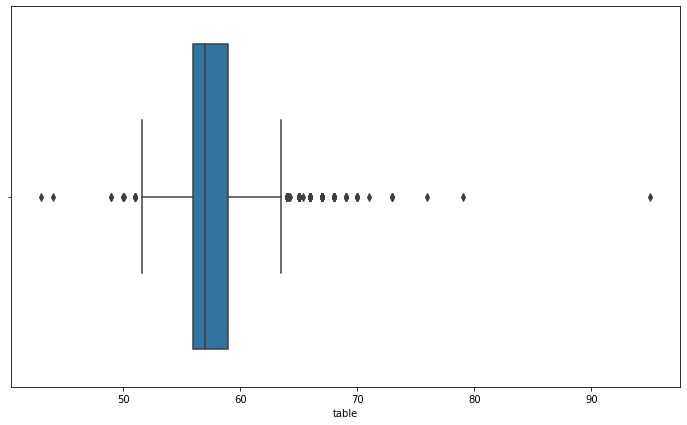

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x=df.table);

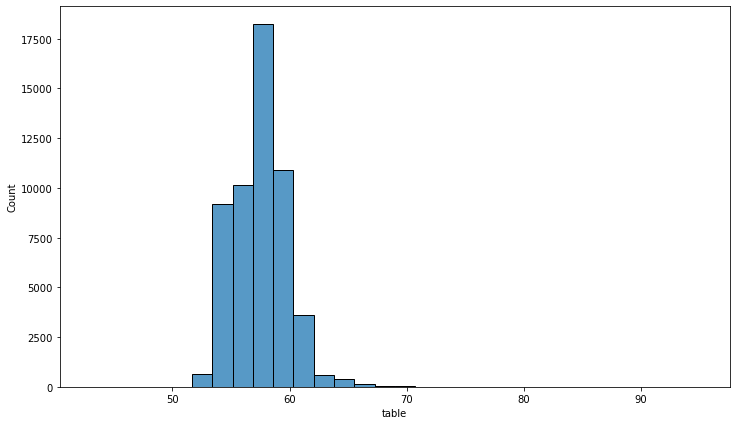

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(df.table, bins=30);

##### 1.b.Detecting Outliers with Tukey's Fences | Tukey's Rule

In [ ]:
Q1 = df.table.quantile(0.25)  # OUTPUT: 56
Q3 = df.table.quantile(0.75)  # OUTPUT: 59
IQR = Q3-Q1
IQR

3.0

In [ ]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR
lower_lim, upper_lim

(51.5, 63.5)

In [ ]:
df.loc[((df.table < lower_lim) | (df.table > upper_lim))]

,carat,depth,table,price,x,y,z
2,0.23,56.9,65.0,327,4.05,4.07,2.31
91,0.86,55.1,69.0,2757,6.45,6.33,3.52
145,0.70,62.1,64.0,2767,5.62,5.65,3.50
219,0.53,57.5,64.0,2782,5.34,5.37,3.08
227,0.84,55.1,67.0,2782,6.39,6.20,3.47
...,...,...,...,...,...,...,...
53695,0.75,59.7,65.0,2717,5.85,5.80,3.48
53697,0.70,64.5,65.0,2717,5.52,5.45,3.54
53756,0.84,55.6,64.0,2724,6.42,6.32,3.54
53757,0.72,55.4,64.0,2724,6.06,5.97,3.34


### 2.Handling Outliers

###### 2.a. Remove Outliers

###### 2.a.1.DROP

In [ ]:
drop_index = df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index
drop_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [ ]:
df.drop(index=drop_index, axis = 0)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


###### 2.a.2.TILDA(~) = "NOT"

In [ ]:
df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))] 
df_cleaned

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


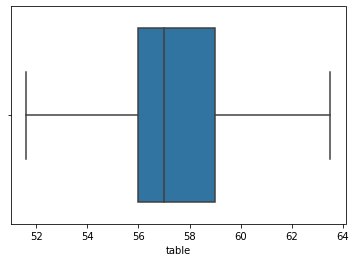

In [ ]:
sns.boxplot(x=df_cleaned.table);

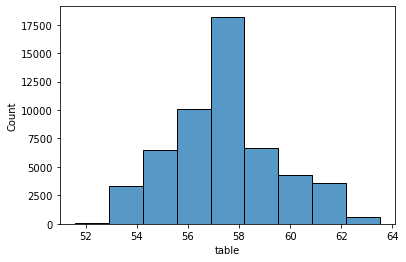

In [ ]:
sns.histplot(df_cleaned.table, bins=9, kde=False);   # df_cleaned.table.mean(): 57.62 , # df_cleaned.table.median(): 57.0

###### 2.b. Winsorize

Oran belirleyerek whiskerslara en yakın olan değere baskılamak

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
data = pd.DataFrame({"var1":[-20,-10,3,4,5,6,7,8,9,58],"var2":[11,12,13,14,15,16,17,18,19,20]})
data

,var1,var2
0,-20,11
1,-10,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19
9,58,20


In [ ]:
Q1 = data.var1.quantile(0.25)
Q3 = data.var1.quantile(0.75)
IQR = Q3-Q1

lower_lim1 = Q1 - 1.5 * IQR
upper_lim1 = Q3 + 1.5 * IQR
lower_lim1, upper_lim1

(-3.5, 14.5)

In [ ]:
a1 = len(data.var1[data.var1<lower_lim1])/len(data) # lower_lim den küçük olan değerlerin yüzdesi
b1 = len(data.var1[data.var1>upper_lim1])/len(data) # upper_lim den büyük olan değerlerin yüzdesi
a1,b1
# data.var1.quantile(0.2)    # 0.40
# data.var1.quantile(0.9)    # 13.89

(0.2, 0.1)

In [ ]:
winsorize(data.var1, (a1,b1))

masked_array(data=[3, 3, 3, 4, 5, 6, 7, 8, 9, 9],
             mask=False,
       fill_value=999999,
            dtype=int64)

###### 2.c. Transformation using log() method

Verinin ölçeğini değiştirerek outlierları azaltmak/kurtulmak(log, square root)

Steve Hoca: Farklı transformation yöntemleri var ancak en sık kullanılan yöntem log almaktır.

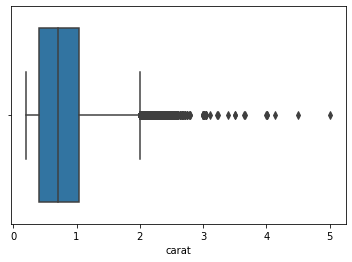

In [ ]:
sns.boxplot(x=df.carat);

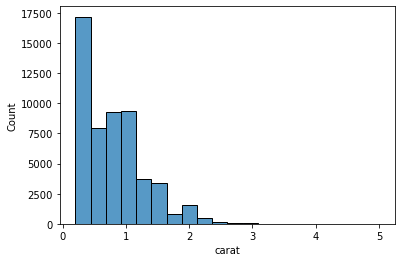

In [ ]:
sns.histplot(x=df.carat, bins=20);

In [ ]:
carat_log = np.log(df.carat)
carat_log

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

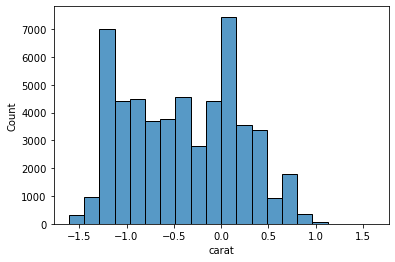

In [ ]:
sns.histplot(x=carat_log, bins=20);   # Dağılım değişti.Normal dağılıma yakınlaştı

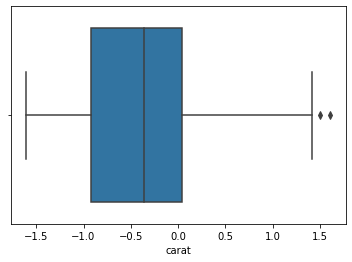

In [ ]:
sns.boxplot(x=carat_log);
# Hala elimizde outlier var bunları 1.Drop ya da 2.Tilda kullanarak verimizden çıkartabiliriz

# ÖZET / CHEAT SHEET

In [ ]:
# MISSING VALUES
    # Bazı Notlar
        # NaN : Not a Number
        # Steve Hoca: Eda dan sonra yapacağımız şey eksik değerlere çözüm bulmak
        # Steve Hoca: Çözüm için net bir metot yok(Veriden veriye değişiklik gösteriyor)
    # Detecting Missing Values
        # df.isnull().sum()
        # df.notnull().sum()    
    # Handling Missing Values
        # 1.Drop
            # a.dropna(axis=0, how="any", thresh=None, inplace=False)  # NaN değerleri drop
            # b.drop(axis=0)                                           # Satır ya da sütunları drop
                # df.drop(["var1","var2"], axis=1)
        # 2. Filling Missing Values (Imputation)
            # 2.a.Filling with a specific value
                # df.fillna(0)   # df.var1.fillna(0)
            # 2.b.Filling with any Proper Value  #  mean(), median(), where , interpolate()
                # df.fillna(df.mean())
                # df.fillna({"dept":"other","var1":df.var1.mean(), "var2":df.var2.median()})
                # df.where(cond = df.notna(), other=df.mean(), axis=1)     # Çok kullanılmıyor
                # df.interpolate                              # Not: "None" şeklinde yazan eksik değerlerde bu yöntem işlemiyor
                    # 2 index arasında tek NaN varsa: Bir üst(örn: 4) ve bir alt(örn: 2) indexe karşılık gelen değerin
                    # .. ortalamasını al ve ara indexe(4 ile 2 arası --> 3. indexe) yazdır
                    # 2 index arasında 2 veya daha çok NaN varsa: linspace mantığı ile çalışıyor.
                    # .. Örneğin 2,3,4,5. indexlerdeki değerler 30,NaN,NaN,39 diyelim.Bunu 30, 33,36,39 şeklinde dolduruyor.
            # 2.c.Filling the Missing Values of Categorical Variables # mode, ffill, bfill
                # df.dept.fillna(df.dept.mode()[0])
                # df["dept"].fillna(method="ffill")   # Yukardan aşağı dolduruyor
                # df["dept"].fillna(method="bfill")   # Aşağıdan yukarı dolduruyor
            # 2.d.Filling by condition & by Group of the Categorical Variables
                # df["trans_salary"] = df.groupby(["status", "dept"]).salary.transform("mean")
                # df.salary.fillna(df.trans_salary, inplace=True)
        # 3. Keep missing values

In [ ]:
# OUTLIERS
    # Detecting Outliers
        # 1.Graphs                           : Box plot, Histogram, Scatter plot
            # sns.boxplot(x=df.table);
            # sns.histplot(x=df.table, bins=20)
        # 2.Tukey's Fences | Tukey's Rule    : IQR method
            # IQR = Q3-Q1
            # Q1- 1.5 x IQR , Q3 + 1.5 x IQR
        # 3.Statistical Tests                : Grubbs' test, Chi-square test, Dixon's Q test (Bu kısımla burada ilgilenmeyeceğiz) 
            # Bunu görmedik
    # Handling with Outliers
        # 1.Remove the outliers          : 1. Drop etmek 2.TILDA(~) = "NOT"
            # a.Drop
                # drop_index = df.loc[((df.table < lower_lim) | (df.table > upper_lim))].index
                # df.drop(index=drop_index, axis = 0)
            # b.Tilda(~)
                # df_cleaned = df.loc[~((df.table < lower_lim) | (df.table > upper_lim))] 
        # 2.Winsorize : Oran belirleyerek whiskerslara en yakın olan değere baskılamak
            # from scipy.stats.mstats import winsorize
            # a1 = len(data.var1[data.var1<lower_lim1])/len(data) # lower_lim den küçük olan değerlerin yüzdesi
            # b1 = len(data.var1[data.var1>upper_lim1])/len(data) # upper_lim den büyük olan değerlerin yüzdesi
            # winsorize(data.var1, (a1,b1))
            # NOT: Steve Hoca: Bana bu yöntem mantıklı gelmiyor.Eğer o outlier yerine bir şey ile dolduramıyorsak drop etmeliyiz
        # 3.Data transformation          : Verinin ölçeğini değiştirerek outlierları azaltmak/kurtulmak(log, square root)
            # carat_log = np.log(df.carat)
            # sns.boxplot(x=carat_log);
            # Hala elimizde outlier var bunları 1.Drop ya da 2.Tilda kullanarak verimizden çıkartabiliriz
        # 4.Replacing the outliers           : (mean, median, mode)
        # 5.Using different analysis methods : Istatistiksel non-parametric testler uygulamak
        # 6.Valuing the outliers             : Aykırı değer yerine başka değer vermek

## Thank you for your time

# PANDAS RECAP-3

In [ ]:
import numpy as np
import pandas as pd

### COMBINING DATAFRAMES

## 1.APPEND

Alt alta ekleme(append) yapar. Append, concatın(pd.concat([df1,df2],axis=0, join='outer') halidir

Eklemeden(Append den) sonra Index numaraları aynı kalır. Ihtiyaca göre, ignore_index=True diyerek indexleri 0,1,2,3,4,... şekline çevirebiliriz

In [ ]:
# df1.append(df2, ignore=index=False)  ---> default
# df1.append([df2,df3,df4,df5], ignore=index=False)  ---> default  --> 2 den fazla df i de append edebiliriz

## 2.CONCATENATION

Satır veya sütunlara göre birleştirme yapar

In [ ]:
# pd.concat([df1,df2],axis=0, join='outer') ---> default, 
# pd.concat([df1,df2,df3,df4,df5],axis=0, join='outer')  ---> default --> 2 den fazla df i de concat edebiliriz

In [ ]:
df4 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df5 = pd.DataFrame({'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7'],
                    'E': ['A4', 'A5', 'A6', 'A7']},
                    index=[4, 1, 2, 3]) 


display(df4,df5)
# Indexlerinin biri farklı, Sütunlarının biri farklı

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


,B,C,D,E
4,B4,C4,D4,A4
1,B5,C5,D5,A5
2,B6,C6,D6,A6
3,B7,C7,D7,A7


In [ ]:
pd.concat([df4,df5], axis=0)   # ignore_index=True  # default join='outer'
##################### df4.append(df5)              # Aynı çıktıyı verir   # # ignore_index=True

,A,B,C,D,E
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B4,C4,D4,A4
1,NaN,B5,C5,D5,A5
2,NaN,B6,C6,D6,A6
3,NaN,B7,C7,D7,A7


In [ ]:
pd.concat([df4,df5],axis=0, join="inner")  # ignore_index=True
# Sütunlardan 3 ü ortak olduğu/kesiştiği için çıktı verdi
# NOT: # df4.append(df5) join aynı çıktıyı vermez çünkü join=inner gibi bir parametresi yok append in

,B,C,D
0,B0,C0,D0
1,B1,C1,D1
2,B2,C2,D2
3,B3,C3,D3
4,B4,C4,D4
1,B5,C5,D5
2,B6,C6,D6
3,B7,C7,D7


In [ ]:
pd.concat([df4,df5], axis=1)  # ignore_index=True # default join='outer'

,A,B,C,D,B,C,D,E
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,B5,C5,D5,A5
2,A2,B2,C2,D2,B6,C6,D6,A6
3,A3,B3,C3,D3,B7,C7,D7,A7
4,NaN,NaN,NaN,NaN,B4,C4,D4,A4


In [ ]:
pd.concat([df4,df5], axis=1, join="inner")
# indexler aynı olduğu için yukarıdaki ile aynı çıktı verdi
# Sütunlar ve sıraları aynı kaldı

,A,B,C,D,B,C,D,E
1,A1,B1,C1,D1,B5,C5,D5,A5
2,A2,B2,C2,D2,B6,C6,D6,A6
3,A3,B3,C3,D3,B7,C7,D7,A7


In [ ]:
pd.concat([df4,df5.reset_index(drop=True)], join="inner", axis=1) # Her şey düzeldi.
# .. reset_index(drop=True) yapınca df5 in indexleri 0,1,2,3 e dönüştü

# ÖNEMLİ NOT: Burada reset_index yapınca indexler 0,1,2,3 olarak başlayacak o yüzden df5  nın indexleri 0,1,2,3 oldu
# Ama df4 ün indexleri 0,1,2,3 olduğu için böyle oldu. Eğer df4 ün indexleri farklı olsaydı bu olmayacaktı

,A,B,C,D,B,C,D,E
0,A0,B0,C0,D0,B4,C4,D4,A4
1,A1,B1,C1,D1,B5,C5,D5,A5
2,A2,B2,C2,D2,B6,C6,D6,A6
3,A3,B3,C3,D3,B7,C7,D7,A7


## 3.MERGING

Yan yana birleştirme işlemi yapar(2 df için).AMA--> df4=pd.merge(pd.merge(df1,df2,on='Courses'),df3,on='Courses' --> Bunu görmedik. İlgilenmeyeceğiz

Yan yana ortak SÜTUNA göre birleştirme işlemi yapar Çıktı da solda gelecek dataframe ve sağda gelecek dataframe yan yana eklenir


In [ ]:
# pd.merge(left=df1, right=df2, how="inner", on='key') ---> default. Burada: on='key' : iki dataframede de ortak olan sütun(key)

In [ ]:
# MERGING
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})   

display(left, right)
# Ortak olan "key" sütunu değerleri aynı

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [ ]:
pd.merge(left=left, right=right, how="inner", on="key") 
# left e(Sola) left df ini, right a(Sağa) right df ini koyduk.
# Ortak olan key sütununun değerleri ortak, direk yan yana birleştirdi
# NOT: Değerlerin sırası farklı olsaydı soldakinin değerlerini baz alır ona göre

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [ ]:
left2 = pd.DataFrame({'key': ['K0', 'K1', 'K4', 'K5'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
display(left2, right2)
# Ortak olan key sütunun değerleri farklı

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K4,A2,B2
3,K5,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [ ]:
pd.merge(left=left2,right=right2, how="inner",on="key") 
# how="inner" # Ortak olan değerlere göre birleştirme yaptı

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1


In [ ]:
pd.merge(left=left2,right=right2, how="outer",on="key") # how="outer" her iki df dede tüm indexlere karşılık gelen değerleri aldık, 
# .. üstteki aynı mantıkta yaptı ama eşleşmeyen değerlere NaN verdi

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K4,A2,B2,NaN,NaN
3,K5,A3,B3,NaN,NaN
4,K2,NaN,NaN,C2,D2
5,K3,NaN,NaN,C3,D3


In [ ]:
pd.merge(left2,right2, how="right",on="key")     # how="right" :right2 nin key değerlerine göre birleştirme.

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,NaN,NaN,C2,D2
3,K3,NaN,NaN,C3,D3


In [ ]:
left3 = pd.DataFrame({'key': ['K0', 'K0', 'K1', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right3 = pd.DataFrame({'key': ['K0', 'K1', 'K1', 'K2'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

display(left3, right3)
# Ortak olan key sütununun değerleri farklı ve left3-key de olan her değer right3-key de var

,key,A,B
0,K0,A0,B0
1,K0,A1,B1
2,K1,A2,B2
3,K1,A3,B3


,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K1,C2,D2
3,K2,C3,D3


In [ ]:
pd.merge(left3,right3, how="inner",on="key") # how="inner" ortak olanları alıyordu # 0. indexte 2 sinde de "key" de 
# K0 olduğu için onu aldı A ve B yi normal yazdı, C ve D yi 0. indexi normal yazdı 1. indexi çoğalttı/çokladı otomatik
# .. 2. ve 3. index aynı mantıkta(3. indexteki C ve D sütununu çokladı)

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A1,B1,C0,D0
2,K1,A2,B2,C1,D1
3,K1,A2,B2,C2,D2
4,K1,A3,B3,C1,D1
5,K1,A3,B3,C2,D2


In [ ]:
pd.merge(left3,right3, how="left",on="key") # Aynı çıktıyı verdi. Çünkü;
# Ortak olan key sütunu için; left3-key de olan her değer right3-key de var

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A1,B1,C0,D0
2,K1,A2,B2,C1,D1
3,K1,A2,B2,C2,D2
4,K1,A3,B3,C1,D1
5,K1,A3,B3,C2,D2


In [ ]:
pd.merge(left3,right3, how="outer",on="key") # how="outer" 2 df dede tüm indexlere karşılık gelen değerleri aldık(2 index daha

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K0,A1,B1,C0,D0
2,K1,A2,B2,C1,D1
3,K1,A2,B2,C2,D2
4,K1,A3,B3,C1,D1
5,K1,A3,B3,C2,D2
6,K2,NaN,NaN,C3,D3


In [ ]:
""" OLASI KOMBINASYONLAR
K0 - K0 A0 B0 C0 D0      *
K0 - K1 A0 B0 C1 D1
K0 - K1 A0 B0 C2 D2
K0 - K2 A0 B0 C3 D3

K0 - K0 A1 B1 C0 D0      *
K0 - K1 A1 B1 C1 D1
K0 - K1 A1 B1 C2 D2
K0 - K2 A1 B1 C3 D3

K1 - K0 A2 B2 C0 D0      
K1 - K1 A2 B2 C1 D1      *
K1 - K1 A2 B2 C2 D2      *
K1 - K2 A2 B2 C3 D3

K1 - K0 A3 B3 C0 D0
K1 - K1 A3 B3 C1 D1      *
K1 - K1 A3 B3 C2 D2      *
K1 - K2 A3 B3 C3 D3      *
"""


' OLASI KOMBINASYONLAR\nK0 - K0 A0 B0 C0 D0      *\nK0 - K1 A0 B0 C1 D1\nK0 - K1 A0 B0 C2 D2\nK0 - K2 A0 B0 C3 D3\n\nK0 - K0 A1 B1 C0 D0      *\nK0 - K1 A1 B1 C1 D1\nK0 - K1 A1 B1 C2 D2\nK0 - K2 A1 B1 C3 D3\n\nK1 - K0 A2 B2 C0 D0      \nK1 - K1 A2 B2 C1 D1      *\nK1 - K1 A2 B2 C2 D2      *\nK1 - K2 A2 B2 C3 D3\n\nK1 - K0 A3 B3 C0 D0\nK1 - K1 A3 B3 C1 D1      *\nK1 - K1 A3 B3 C2 D2      *\nK1 - K2 A3 B3 C3 D3      *\n'

In [ ]:
left4 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2','K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1','K1'],
                        'A': ['A0', 'A1', 'A2', 'A3','A4'],
                        'B': ['B0', 'B1', 'B2', 'B3','B4']})
    
right4 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2','K3'],
                       'key2': ['K0', 'K0', 'K0', 'K0','K1'],
                       'C': ['C0', 'C1', 'C2', 'C3','C4'],
                       'D': ['D0', 'D1', 'D2', 'D3','D4']})

display(left4, right4) # Burada primary key ler 2 tane

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3
4,K2,K1,A4,B4


,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3
4,K3,K1,C4,D4


In [ ]:
pd.merge(left4, right4, how="inner", on=["key1","key2"]) # how="inner". key1 ve key2 si 2 df de de eşleşen key değerlerini aldık. 

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [ ]:
pd.merge(left4, right4, how="outer", on=["key1","key2"]) # how="outer" 2 df de de key1 ve key2 nin indexlerine karşılık gelen değerler

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K1,A4,B4,NaN,NaN
6,K2,K0,NaN,NaN,C3,D3
7,K3,K1,NaN,NaN,C4,D4


In [ ]:
pd.merge(left4, right4, how="left", on=["key1","key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K1,A4,B4,NaN,NaN


In [ ]:
left5 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x', 'z'],
                     'lvalue': [2, 3, 5, 7, 0]})

right5 = pd.DataFrame({'rkey': ['a', 'x', 'z', 'b'],
                     'rvalue': [7, 8, 9, 10]})

display(left5, right5)

,lkey,lvalue
0,x,2
1,y,3
2,z,5
3,x,7
4,z,0


,rkey,rvalue
0,a,7
1,x,8
2,z,9
3,b,10


In [ ]:
pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="inner") # how="inner" ortak olan aynı değerleri döndürdü 2 ayrı sütunda

,lkey,lvalue,rkey,rvalue
0,x,2,x,8
1,x,7,x,8
2,z,5,z,9
3,z,0,z,9


In [ ]:
pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="outer")

,lkey,lvalue,rkey,rvalue
0,x,2.0,x,8.0
1,x,7.0,x,8.0
2,y,3.0,NaN,NaN
3,z,5.0,z,9.0
4,z,0.0,z,9.0
5,NaN,NaN,a,7.0
6,NaN,NaN,b,10.0


In [ ]:
pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="left")

,lkey,lvalue,rkey,rvalue
0,x,2,x,8.0
1,y,3,NaN,NaN
2,z,5,z,9.0
3,x,7,x,8.0
4,z,0,z,9.0


In [ ]:
pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="right")

,lkey,lvalue,rkey,rvalue
0,NaN,NaN,a,7
1,x,2.0,x,8
2,x,7.0,x,8
3,z,5.0,z,9
4,z,0.0,z,9
5,NaN,NaN,b,10


In [ ]:
left6 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x'],
                        'lvalue': [2, 3, 5, 7]})

right6 = pd.DataFrame({'rkey': ['a', 'b', 'c', 'b'],
                         'rvalue': [7, 8, 9, 10]})

display(left6, right6) # Burada da indexler üzerinden yola çıkarak birleştirme yapacağız

,lkey,lvalue
0,x,2
1,y,3
2,z,5
3,x,7


,rkey,rvalue
0,a,7
1,b,8
2,c,9
3,b,10


In [ ]:
pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="inner")   # how="inner" ilgili ortak index bulamadığı için boş geldi

,lkey,lvalue,rkey,rvalue


In [ ]:
pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="outer")   # Tüm lkey ve rkey değerlerini aldı Eşleşmeyenler NaN

,lkey,lvalue,rkey,rvalue
0,x,2.0,NaN,NaN
1,x,7.0,NaN,NaN
2,y,3.0,NaN,NaN
3,z,5.0,NaN,NaN
4,NaN,NaN,a,7.0
5,NaN,NaN,b,8.0
6,NaN,NaN,b,10.0
7,NaN,NaN,c,9.0


In [ ]:
pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="left") 

,lkey,lvalue,rkey,rvalue
0,x,2,NaN,NaN
1,y,3,NaN,NaN
2,z,5,NaN,NaN
3,x,7,NaN,NaN


In [ ]:
pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="right") 

,lkey,lvalue,rkey,rvalue
0,NaN,NaN,a,7
1,NaN,NaN,b,8
2,NaN,NaN,c,9
3,NaN,NaN,b,10


In [ ]:
pd.merge(left6, right6, left_index=True, right_index=True, how="outer") # left_index=True, right_index=True: indexleri kullanabiliriz

,lkey,lvalue,rkey,rvalue
0,x,2,a,7
1,y,3,b,8
2,z,5,c,9
3,x,7,b,10


## 4.JOIN

In [ ]:
left7 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index = ['K0', 'K1', 'K2']) 

right7 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index = ['K0', 'K2', 'K3'])
display(left7, right7)

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [ ]:
left7.join(right7) # left7 nin yanına right7 yi koydu, indexleri ortak olanların değerleri geldi. 

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [ ]:
# .. Ortak olmayan "K1" indexinin C ve D değerleri NaN geldi
# Not: Burada how="left" default. O yüzden soldaki df in(left7 nin) indexlerini getirdi
right7.join(left7) # Üsttekinin tam tersi

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [ ]:
left8 = pd.DataFrame({'key1': ['K0', 'K2', 'K3', 'K4', 'K5', 'K6'],
                   'X': ['X0', 'X2', 'X3', 'X4', 'X5', 'X6']})

right8 = pd.DataFrame({'key': ['K0', 'K2', 'K3','K7'],
                      'Y': ['Y0', 'Y2', 'Y3','Y4']})
display(left8, right8)

,key1,X
0,K0,X0
1,K2,X2
2,K3,X3
3,K4,X4
4,K5,X5
5,K6,X6


,key,Y
0,K0,Y0
1,K2,Y2
2,K3,Y3
3,K7,Y4


In [ ]:
# left8.join(right8)  # HATA. Aynı isimdeki column(key) olunca birleştirmiyor "join". Bunu concat yapıyordu
# .. Bunu engellemek için "lsuffix" ve "rsuffix" kullanabiliriz
left8.join(right8, lsuffix="_left", rsuffix="_right") # Ortak isimli sütunların sonuna "_left" ve "_right" ekledi

,key1,X,key,Y
0,K0,X0,K0,Y0
1,K2,X2,K2,Y2
2,K3,X3,K3,Y3
3,K4,X4,K7,Y4
4,K5,X5,NaN,NaN
5,K6,X6,NaN,NaN


In [ ]:
# If you want to join using the key columns, you need to set key to be the index in both df and other.
# The joined DataFrame will have key as its index.
# Öyle birleştirelim "key_left", "key_right" çıktısı gelmesin dersem; # "Key" leri index e taşıyabilirim.
left8.set_index("key").join(right8.set_index("key")) # merge ün yaptığı bir işlem için burada "set_index" vs yazıp işlemi uzatıyoruz

KeyError: "None of ['key'] are in the columns"

In [ ]:
# left8.join(right8, on="key") # Hata. on="key" dediğimizde sadece left8 e göre "key" i alacak. Çözüm için;
left8.join(right8.set_index("key"), on="key")   # left in "key" ini sütuna yazar, right "key" i göstermedi

# ÖZET/CHEAT SHEET

In [ ]:
# COMBINING DATA FRAMES
###############################################################################################################
# 1.APPEND : Alt alta ekleme(append) yapar. Append, concatın(pd.concat([df1,df2],axis=0, join='outer') halidir
    # df1.append(df2, ignore=index=False) ---> default
    # df1.append([df2,df3,df4,df5], ignore=index=False) ---> default --> 2 den fazla df i de append edebiliriz
    # Eklemeden(Append den) sonra Index numaraları aynı kalır. Ihtiyaca göre, ignore_index=True diyerek indexleri 0,1,2,3,4,... şekline çevirebiliriz
    # NOT: "join" parametresi yoktur
###############################################################################################################  
# 2.CONCATENATION  : Satır veya sütunlara göre birleştirme yapar
    # pd.concat([df1,df2],axis=0, join='outer') ---> default
    # pd.concat([df1,df2,df3,df4,df5],axis=0, join='outer') ---> default --> 2 den fazla df i de concat edebiliriz
    # NOT: join= "inner"(KESİŞİM/ORTAK), join="outer"(BİRLEŞİM/OLASI TÜM COMBINASYON) vardır. join= "left", join="right" YOKTUR
        # JOIN = "inner" : Ortak olanları alır, eşleşmeyenler değerler gelmez.
            # join="inner" --> Yan yana(axis=1) concat yaparken indexler farklı ise indexlerin ortak olanları alır. Eşleşmeyenler değerler gelmez
                # pd.concat([df4,df6], axis=1, join="inner") 
            # join="inner" --> Alt alta(axis=0) concat yaparken sütunlar farklı ise sütunların ortak olanları alır. Eşleşmeyenler değerler gelmez
                # pd.concat([df4,df5],axis=0, join="inner")
            # Eğer birden fazla df concat olursa join="inner" ile ,mantık aynı
            # NOT :  Eşleşmeyenler gelsin diye "ignore_index" kullanılabilir
                # pd.concat([df4,df5.reset_index(drop=True)], join="inner", axis=1)
        # JOIN ="outer"  : Bütün olası sonuçları alır, eşleşmeyen değerler NaN gelir
            # join="outer" --> Yan yana(axis=1) concat yaparken olası tüm indexler gelir. Eşleşmeyen değerler NaN gelir
                # pd.concat([df4,df5], axis=1, join="outer")
            # join="outer" --> Alt alta(axis=0) concat yaparken olası tüm sütunlar gelir. Eşleşmeyen değerler NaN gelir 
                # pd.concat([df4,df5], axis=0, join="outer")
            # Eğer birden fazla df concat olursa join="inner" ile ,mantık aynı
###############################################################################################################
# 3.MERGE : Yan yana ortak SÜTUNA göre birleştirme işlemi yapar Çıktı da solda gelecek dataframe ve sağda gelecek dataframe yan yana eklenir
    #############*********************************#################
    # AŞAĞININ ÖZETİ:
        # how="inner" : ortak olan keyleri / kombinasyonlarını alıp birleştirir. Eşleşmeyen değerler gelmez
        # how="outer" : Olası tüm keyleri / kombinasyonlarını alıp birleştirir. Eşleşmeyen değerler NaN gelir
        # how="left"  : soldaki df in keylerini alıp birleştirir. Eşleşmeyen değerler NaN gelir
        # how="right" : sağdaki df in keylerini alıp birleştirir. Eşleşmeyen değerler NaN gelir
    #############*********************************#################
    # pd.merge(left=df1, right=df2, how="inner", on='key')  ---> default on='key' : iki dataframede de ortak olan sütun(key)
    # NOT: 2 den fazla df birleşim--> df4=pd.merge(pd.merge(df1,df2,on='Courses'),df3,on='Courses' --> Bunu görmedik. İlgilenmeyeceğiz
    # NOT: how= "inner"(KESİŞİM/ORTAK), how="outer"(BİRLEŞİM/OLASI TÜM COMBINASYON), how= "left"(SOLA GÖRE ORTAK), how="right"(SAĞA GÖRE ORTAK)) vardır. 
        # TEK KEY(Ortak sütun) VARSA; NOT:Aşağıda "değer" derken "key" olan sütunun değerlerinden bahsediyor olacağız
            # Sütunlarda her DEĞERDEN BİR TANE, DEĞERLER AYNI ve SIRASI DA AYNI ise; how="inner", how="outer", how="left", how="right" aynı çıktıyı verir
            ########## left-key: 'K0', 'K1', 'K2', 'K3'  ######### right-key: 'K0', 'K1', 'K2', 'K3'
                # pd.merge(left=left, right=right, how="inner", on="key") 
            # Sütunlarda her DEĞERDEN BİR TANE, DEĞERLER AYNI ve left1-key in SIRASI FARKLI ise; how="inner", how="outer", how="left", AYNI how="right"  FARKLI çıktıyı verir
            ########## left-key: 'K1', 'K0', 'K2', 'K3'  ######### right-key: 'K0', 'K1', 'K2', 'K3'
                # Üstteki örnekte left-key i K1,K0,K2,K3 olacak şekilde değiştirip sonuç görebiliriz
            # Sütunlarda her DEĞERDEN BİR TANE, değerlerinin BAZILARI aynı ise ; 
            ######### left-key: 'K0', 'K1', 'K4', 'K5'    ######### left-key: 'K0', 'K1', 'K2', 'K3'
                # how="inner" da ortak olan değerleri alır. Eşleşmeyen değerler gelmez
                    # pd.merge(left=left2,right=right2, how="inner",on="key")
                # how="outer" da tüm olası değerleri alır.  Eşleşmeyen değerler NaN gelir
                    # pd.merge(left=left2,right=right2, how="outer",on="key")
                 # how="left" soldaki keyleri alarak sonuç gelir. Eşleşmeyenler NaN gelir
                    # pd.merge(left=left2,right=right2, how="left",on="key")
                # how="right" sağdaki keyleri alarak sonuç gelir. Eşleşmeyenler NaN gelir
                    # pd.merge(left=left2,right=right2, how="right",on="key")
            # Sütunlarda BAZI DEĞERLER ÇOKLU ve bazı değerler aynı ise; 
            ######### LEFT3-KEY:'K0', 'K0', 'K1', 'K1'  ######### RIGHT3-KEY: 'K0', 'K1', 'K1', 'K2'
                    # how="left"  a göre; SOLU baz alarak çarprazlama  kombinasyonlar
                        # pd.merge(left3,right3, how="left",on="key")
                        # Satır sayısı: 2x1 + 2x2 = 6 
                    # how="right" a göre; SAĞI baz alarak çarprazlama kombinasyonlar
                        # pd.merge(left3,right3, how="right",on="key")
                        # Satır sayısı: 1x2 + 2x2 + 1 = 7 
                    # how="inner" a göre; ORTAK olan çarprazlama  kombinasyonlar
                        # pd.merge(left3,right3, how="inner",on="key")
                        # Satır sayısı: 2x1 + 2x2 = 6 
                    # how="outer" a göre; OLASI Çarprazlama  kombinasyonlar
                        # pd.merge(left3,right3, how="outer",on="key")
                        # Satır sayısı: 2x1(ya da 1x2) + 2x2(ya da 2x2) + 1(sağdan(K2) gelen 1) = 7 
         # IKI KEY(Ortak sütun) VARSA; NOT:Aşağıda "değer" derken "key" olan sütunlarındeğerlerinden bahsediyor olacağız    
            # Sütunlarda BAZI DEĞERLER ÇOKLU ve bazı değerler aynı ise; key1 ve key2 ler var
            ######### left-key1: 'K0', 'K0', 'K1', 'K2','K2'  ######### right-key1: 'K0', 'K1', 'K1', 'K2','K3'
            ######### left-key2: 'K0', 'K1', 'K0', 'K1','K1'  ######### right-key2: 'K0', 'K0', 'K0', 'K0','K1'
                # how="left"  a göre; SOLU baz alarak çarprazlama  kombinasyonlar
                    # soldaki df in key1-key2 kombinasyonuna göre
                    # pd.merge(left4, right4, how="left", on=["key1","key2"])
                # how="right" a göre; SAĞI baz alarak çarprazlama kombinasyonlar
                    # sağdaki df in key1-key2 kombinasyonuna göre
                    # pd.merge(left4, right4, how="right", on=["key1","key2"])
                # how="inner" a göre; ORTAK olan çarprazlama  kombinasyonlar
                    # pd.merge(left4, right4, how="inner", on=["key1","key2"])
                    # İki df in de key1-key2 lerin ortak olan kombinasyonlarına göre
                # how="outer" a göre; OLASI Çarprazlama  kombinasyonlar   
                    # pd.merge(left4, right4, how="outer", on=["key1","key2"])
                    # İki df in olası key1-key lerin olası tüm kombinasyonlarına göre
                # NOT: satır sayısı mantıkları, üstte açıklananla aynı
        
            # TEK KEY Sütunlarda BAZI DEĞERLER ÇOKLU ve bazı değerler aynı ise Ve satır sayıları eşit DEĞİLSE; lkey ve rkey var
            ######### lkey': ['x', 'y', 'z', 'x', 'z']  #########'rkey': ['a', 'x', 'z', 'b']
                # how="left"  a göre; SOLU baz alarak çarprazlama  kombinasyonlar
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="left")
                    # soldaki df in lkey-rkey kombinasyonuna göre
                # how="right" a göre; SAĞI baz alarak çarprazlama kombinasyonlar
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="right")
                    # sağdaki df in lkey-rkey kombinasyonuna göre
                # how="inner" a göre; lkey-rkey ORTAK olan çarprazlama  kombinasyonlar
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="inner")
                    # İki df in de lkey-rkey lerin ortak olan kombinasyonlarına göre
                # how="outer" a göre; OLASI Çarprazlama  kombinasyonlar   
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="outer")
                    # İki df in olası lkey-rkey lerin olası tüm kombinasyonlarına göre
                # NOT: satır sayısı mantıkları, üstte açıklananla aynı
            # TEK KEY Sütunlarda değerler aynı değilse;
             #########'lkey': ['x', 'y', 'z', 'x'],  #########'rkey': ['a', 'b', 'c', 'b']
               # how="left"  a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="left")
                   # Soldaki df gelir, sağdaki df değerleri NaN gelir
               # how="right" a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="right")
                   # Sağdaki df gelir, soldaki df değerleri NaN gelir
               # how="inner" a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="inner")
                   # Boş gelir
               # how="outer" a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="outer") 
                   # how="left" ile how="right" alt alta eklenmiş gibi gelir 
               # NOT: pd.merge(left6, right6, left_index=True, right_index=True, how="outer") --> Bunu ders "how" ın ne olduğu önemli değil hepsi aynı çıktı
            
###############################################################################################################
# 4.JOIN : Indexe ya da sütuna göre birleştirme yapar
    # left.join(right)  or right.join(left)
    # index belirtilmişse indexe göre birleştirme yapar
        # left7.join(right7)
    # index belirtilmemişse sütunlarda birleştirme yapar. Eşleşmeyenler NaN gelir
    # ANCAK key olarak kullanılacak sütun isimleri aynı olanları birleştiremez. 
    # Bunu önlemek için lsuffix="_left", rsuffix="_right"
        # left8.join(right8, lsuffix="_left", rsuffix="_right")
    # "Key" leri index e taşıyabilirim.
        # left8.set_index("key").join(right8.set_index("key"))  # left in "key" ini index olarak kullanır
    # left8.join(right8.set_index("key"), on="key")            # left in "key" ini sütuna yazar, right "key" i göstermez

In [ ]:
# PANDAS RECAP-3

import numpy as np
import pandas as pd

### COMBINING DATAFRAMES

## 1.APPEND

Alt alta ekleme(append) yapar. Append, concatın(pd.concat([df1,df2],axis=0, join='outer') halidir

Eklemeden(Append den) sonra Index numaraları aynı kalır. Ihtiyaca göre, ignore_index=True diyerek indexleri 0,1,2,3,4,... şekline çevirebiliriz

# df1.append(df2, ignore=index=False)  ---> default
# df1.append([df2,df3,df4,df5], ignore=index=False)  ---> default  --> 2 den fazla df i de append edebiliriz

## 2.CONCATENATION

Satır veya sütunlara göre birleştirme yapar

# pd.concat([df1,df2],axis=0, join='outer') ---> default, 
# pd.concat([df1,df2,df3,df4,df5],axis=0, join='outer')  ---> default --> 2 den fazla df i de concat edebiliriz

df4 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df5 = pd.DataFrame({'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7'],
                    'E': ['A4', 'A5', 'A6', 'A7']},
                    index=[4, 1, 2, 3]) 


display(df4,df5)
# Indexlerinin biri farklı, Sütunlarının biri farklı

pd.concat([df4,df5], axis=0)   # ignore_index=True  # default join='outer'
##################### df4.append(df5)              # Aynı çıktıyı verir   # # ignore_index=True

pd.concat([df4,df5],axis=0, join="inner")  # ignore_index=True
# Sütunlardan 3 ü ortak olduğu/kesiştiği için çıktı verdi
# NOT: # df4.append(df5) join aynı çıktıyı vermez çünkü join=inner gibi bir parametresi yok append in

pd.concat([df4,df5], axis=1)  # ignore_index=True # default join='outer'

pd.concat([df4,df5], axis=1, join="inner")
# indexler aynı olduğu için yukarıdaki ile aynı çıktı verdi
# Sütunlar ve sıraları aynı kaldı

pd.concat([df4,df5.reset_index(drop=True)], join="inner", axis=1) # Her şey düzeldi.
# .. reset_index(drop=True) yapınca df5 in indexleri 0,1,2,3 e dönüştü

# ÖNEMLİ NOT: Burada reset_index yapınca indexler 0,1,2,3 olarak başlayacak o yüzden df5  nın indexleri 0,1,2,3 oldu
# Ama df4 ün indexleri 0,1,2,3 olduğu için böyle oldu. Eğer df4 ün indexleri farklı olsaydı bu olmayacaktı

## 3.MERGING

Yan yana birleştirme işlemi yapar(2 df için).AMA--> df4=pd.merge(pd.merge(df1,df2,on='Courses'),df3,on='Courses' --> Bunu görmedik. İlgilenmeyeceğiz

Yan yana ortak SÜTUNA göre birleştirme işlemi yapar Çıktı da solda gelecek dataframe ve sağda gelecek dataframe yan yana eklenir


# pd.merge(left=df1, right=df2, how="inner", on='key') ---> default. Burada: on='key' : iki dataframede de ortak olan sütun(key)

# MERGING
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})   

display(left, right)
# Ortak olan "key" sütunu değerleri aynı

pd.merge(left=left, right=right, how="inner", on="key") 
# left e(Sola) left df ini, right a(Sağa) right df ini koyduk.
# Ortak olan key sütununun değerleri ortak, direk yan yana birleştirdi
# NOT: Değerlerin sırası farklı olsaydı soldakinin değerlerini baz alır ona göre

left2 = pd.DataFrame({'key': ['K0', 'K1', 'K4', 'K5'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right2 = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})
display(left2, right2)
# Ortak olan key sütunun değerleri farklı

pd.merge(left=left2,right=right2, how="inner",on="key") 
# how="inner" # Ortak olan değerlere göre birleştirme yaptı

pd.merge(left=left2,right=right2, how="outer",on="key") # how="outer" her iki df dede tüm indexlere karşılık gelen değerleri aldık, 
# .. üstteki aynı mantıkta yaptı ama eşleşmeyen değerlere NaN verdi

pd.merge(left2,right2, how="right",on="key")     # how="right" :right2 nin key değerlerine göre birleştirme.

left3 = pd.DataFrame({'key': ['K0', 'K0', 'K1', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
right3 = pd.DataFrame({'key': ['K0', 'K1', 'K1', 'K2'],
                       'C': ['C0', 'C1', 'C2', 'C3'],
                       'D': ['D0', 'D1', 'D2', 'D3']})

display(left3, right3)
# Ortak olan key sütununun değerleri farklı ve left3-key de olan her değer right3-key de var

pd.merge(left3,right3, how="inner",on="key") # how="inner" ortak olanları alıyordu # 0. indexte 2 sinde de "key" de 
# K0 olduğu için onu aldı A ve B yi normal yazdı, C ve D yi 0. indexi normal yazdı 1. indexi çoğalttı/çokladı otomatik
# .. 2. ve 3. index aynı mantıkta(3. indexteki C ve D sütununu çokladı)

pd.merge(left3,right3, how="left",on="key") # Aynı çıktıyı verdi. Çünkü;
# Ortak olan key sütunu için; left3-key de olan her değer right3-key de var

pd.merge(left3,right3, how="outer",on="key") # how="outer" 2 df dede tüm indexlere karşılık gelen değerleri aldık(2 index daha

""" OLASI KOMBINASYONLAR
K0 - K0 A0 B0 C0 D0      *
K0 - K1 A0 B0 C1 D1
K0 - K1 A0 B0 C2 D2
K0 - K2 A0 B0 C3 D3

K0 - K0 A1 B1 C0 D0      *
K0 - K1 A1 B1 C1 D1
K0 - K1 A1 B1 C2 D2
K0 - K2 A1 B1 C3 D3

K1 - K0 A2 B2 C0 D0      
K1 - K1 A2 B2 C1 D1      *
K1 - K1 A2 B2 C2 D2      *
K1 - K2 A2 B2 C3 D3

K1 - K0 A3 B3 C0 D0
K1 - K1 A3 B3 C1 D1      *
K1 - K1 A3 B3 C2 D2      *
K1 - K2 A3 B3 C3 D3      *
"""


left4 = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2','K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1','K1'],
                        'A': ['A0', 'A1', 'A2', 'A3','A4'],
                        'B': ['B0', 'B1', 'B2', 'B3','B4']})
    
right4 = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2','K3'],
                       'key2': ['K0', 'K0', 'K0', 'K0','K1'],
                       'C': ['C0', 'C1', 'C2', 'C3','C4'],
                       'D': ['D0', 'D1', 'D2', 'D3','D4']})

display(left4, right4) # Burada primary key ler 2 tane

pd.merge(left4, right4, how="inner", on=["key1","key2"]) # how="inner". key1 ve key2 si 2 df de de eşleşen key değerlerini aldık. 

pd.merge(left4, right4, how="outer", on=["key1","key2"]) # how="outer" 2 df de de key1 ve key2 nin indexlerine karşılık gelen değerler

pd.merge(left4, right4, how="left", on=["key1","key2"])

left5 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x', 'z'],
                     'lvalue': [2, 3, 5, 7, 0]})

right5 = pd.DataFrame({'rkey': ['a', 'x', 'z', 'b'],
                     'rvalue': [7, 8, 9, 10]})

display(left5, right5)

pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="inner") # how="inner" ortak olan aynı değerleri döndürdü 2 ayrı sütunda

pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="outer")

pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="left")

pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="right")

left6 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x'],
                        'lvalue': [2, 3, 5, 7]})

right6 = pd.DataFrame({'rkey': ['a', 'b', 'c', 'b'],
                         'rvalue': [7, 8, 9, 10]})

display(left6, right6) # Burada da indexler üzerinden yola çıkarak birleştirme yapacağız

pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="inner")   # how="inner" ilgili ortak index bulamadığı için boş geldi

pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="outer")   # Tüm lkey ve rkey değerlerini aldı Eşleşmeyenler NaN

pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="left") 

pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="right") 

pd.merge(left6, right6, left_index=True, right_index=True, how="outer") # left_index=True, right_index=True: indexleri kullanabiliriz

## 4.JOIN

left7 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index = ['K0', 'K1', 'K2']) 

right7 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index = ['K0', 'K2', 'K3'])
display(left7, right7)

left7.join(right7) # left7 nin yanına right7 yi koydu, indexleri ortak olanların değerleri geldi. 

# .. Ortak olmayan "K1" indexinin C ve D değerleri NaN geldi
# Not: Burada how="left" default. O yüzden soldaki df in(left7 nin) indexlerini getirdi
right7.join(left7) # Üsttekinin tam tersi

left8 = pd.DataFrame({'key1': ['K0', 'K2', 'K3', 'K4', 'K5', 'K6'],
                   'X': ['X0', 'X2', 'X3', 'X4', 'X5', 'X6']})

right8 = pd.DataFrame({'key': ['K0', 'K2', 'K3','K7'],
                      'Y': ['Y0', 'Y2', 'Y3','Y4']})
display(left8, right8)

# left8.join(right8)  # HATA. Aynı isimdeki column(key) olunca birleştirmiyor "join". Bunu concat yapıyordu
# .. Bunu engellemek için "lsuffix" ve "rsuffix" kullanabiliriz
left8.join(right8, lsuffix="_left", rsuffix="_right") # Ortak isimli sütunların sonuna "_left" ve "_right" ekledi

# If you want to join using the key columns, you need to set key to be the index in both df and other.
# The joined DataFrame will have key as its index.
# Öyle birleştirelim "key_left", "key_right" çıktısı gelmesin dersem; # "Key" leri index e taşıyabilirim.
left8.set_index("key").join(right8.set_index("key")) # merge ün yaptığı bir işlem için burada "set_index" vs yazıp işlemi uzatıyoruz

# left8.join(right8, on="key") # Hata. on="key" dediğimizde sadece left8 e göre "key" i alacak. Çözüm için;
left8.join(right8.set_index("key"), on="key")   # left in "key" ini sütuna yazar, right "key" i göstermedi

# ÖZET/CHEAT SHEET

# COMBINING DATA FRAMES
###############################################################################################################
# 1.APPEND : Alt alta ekleme(append) yapar. Append, concatın(pd.concat([df1,df2],axis=0, join='outer') halidir
    # df1.append(df2, ignore=index=False) ---> default
    # df1.append([df2,df3,df4,df5], ignore=index=False) ---> default --> 2 den fazla df i de append edebiliriz
    # Eklemeden(Append den) sonra Index numaraları aynı kalır. Ihtiyaca göre, ignore_index=True diyerek indexleri 0,1,2,3,4,... şekline çevirebiliriz
    # NOT: "join" parametresi yoktur
###############################################################################################################  
# 2.CONCATENATION  : Satır veya sütunlara göre birleştirme yapar
    # pd.concat([df1,df2],axis=0, join='outer') ---> default
    # pd.concat([df1,df2,df3,df4,df5],axis=0, join='outer') ---> default --> 2 den fazla df i de concat edebiliriz
    # NOT: join= "inner"(KESİŞİM/ORTAK), join="outer"(BİRLEŞİM/OLASI TÜM COMBINASYON) vardır. join= "left", join="right" YOKTUR
        # JOIN = "inner" : Ortak olanları alır, eşleşmeyenler değerler gelmez.
            # join="inner" --> Yan yana(axis=1) concat yaparken indexler farklı ise indexlerin ortak olanları alır. Eşleşmeyenler değerler gelmez
                # pd.concat([df4,df6], axis=1, join="inner") 
            # join="inner" --> Alt alta(axis=0) concat yaparken sütunlar farklı ise sütunların ortak olanları alır. Eşleşmeyenler değerler gelmez
                # pd.concat([df4,df5],axis=0, join="inner")
            # Eğer birden fazla df concat olursa join="inner" ile ,mantık aynı
            # NOT :  Eşleşmeyenler gelsin diye "ignore_index" kullanılabilir
                # pd.concat([df4,df5.reset_index(drop=True)], join="inner", axis=1)
        # JOIN ="outer"  : Bütün olası sonuçları alır, eşleşmeyen değerler NaN gelir
            # join="outer" --> Yan yana(axis=1) concat yaparken olası tüm indexler gelir. Eşleşmeyen değerler NaN gelir
                # pd.concat([df4,df5], axis=1, join="outer")
            # join="outer" --> Alt alta(axis=0) concat yaparken olası tüm sütunlar gelir. Eşleşmeyen değerler NaN gelir 
                # pd.concat([df4,df5], axis=0, join="outer")
            # Eğer birden fazla df concat olursa join="inner" ile ,mantık aynı
###############################################################################################################
# 3.MERGE : Yan yana ortak SÜTUNA göre birleştirme işlemi yapar Çıktı da solda gelecek dataframe ve sağda gelecek dataframe yan yana eklenir
    #############*********************************#################
    # AŞAĞININ ÖZETİ:
        # how="inner" : ortak olan keyleri / kombinasyonlarını alıp birleştirir. Eşleşmeyen değerler gelmez
        # how="outer" : Olası tüm keyleri / kombinasyonlarını alıp birleştirir. Eşleşmeyen değerler NaN gelir
        # how="left"  : soldaki df in keylerini alıp birleştirir. Eşleşmeyen değerler NaN gelir
        # how="right" : sağdaki df in keylerini alıp birleştirir. Eşleşmeyen değerler NaN gelir
    #############*********************************#################
    # pd.merge(left=df1, right=df2, how="inner", on='key')  ---> default on='key' : iki dataframede de ortak olan sütun(key)
    # NOT: 2 den fazla df birleşim--> df4=pd.merge(pd.merge(df1,df2,on='Courses'),df3,on='Courses' --> Bunu görmedik. İlgilenmeyeceğiz
    # NOT: how= "inner"(KESİŞİM/ORTAK), how="outer"(BİRLEŞİM/OLASI TÜM COMBINASYON), how= "left"(SOLA GÖRE ORTAK), how="right"(SAĞA GÖRE ORTAK)) vardır. 
        # TEK KEY(Ortak sütun) VARSA; NOT:Aşağıda "değer" derken "key" olan sütunun değerlerinden bahsediyor olacağız
            # Sütunlarda her DEĞERDEN BİR TANE, DEĞERLER AYNI ve SIRASI DA AYNI ise; how="inner", how="outer", how="left", how="right" aynı çıktıyı verir
            ########## left-key: 'K0', 'K1', 'K2', 'K3'  ######### right-key: 'K0', 'K1', 'K2', 'K3'
                # pd.merge(left=left, right=right, how="inner", on="key") 
            # Sütunlarda her DEĞERDEN BİR TANE, DEĞERLER AYNI ve left1-key in SIRASI FARKLI ise; how="inner", how="outer", how="left", AYNI how="right"  FARKLI çıktıyı verir
            ########## left-key: 'K1', 'K0', 'K2', 'K3'  ######### right-key: 'K0', 'K1', 'K2', 'K3'
                # Üstteki örnekte left-key i K1,K0,K2,K3 olacak şekilde değiştirip sonuç görebiliriz
            # Sütunlarda her DEĞERDEN BİR TANE, değerlerinin BAZILARI aynı ise ; 
            ######### left-key: 'K0', 'K1', 'K4', 'K5'    ######### left-key: 'K0', 'K1', 'K2', 'K3'
                # how="inner" da ortak olan değerleri alır. Eşleşmeyen değerler gelmez
                    # pd.merge(left=left2,right=right2, how="inner",on="key")
                # how="outer" da tüm olası değerleri alır.  Eşleşmeyen değerler NaN gelir
                    # pd.merge(left=left2,right=right2, how="outer",on="key")
                 # how="left" soldaki keyleri alarak sonuç gelir. Eşleşmeyenler NaN gelir
                    # pd.merge(left=left2,right=right2, how="left",on="key")
                # how="right" sağdaki keyleri alarak sonuç gelir. Eşleşmeyenler NaN gelir
                    # pd.merge(left=left2,right=right2, how="right",on="key")
            # Sütunlarda BAZI DEĞERLER ÇOKLU ve bazı değerler aynı ise; 
            ######### LEFT3-KEY:'K0', 'K0', 'K1', 'K1'  ######### RIGHT3-KEY: 'K0', 'K1', 'K1', 'K2'
                    # how="left"  a göre; SOLU baz alarak çarprazlama  kombinasyonlar
                        # pd.merge(left3,right3, how="left",on="key")
                        # Satır sayısı: 2x1 + 2x2 = 6 
                    # how="right" a göre; SAĞI baz alarak çarprazlama kombinasyonlar
                        # pd.merge(left3,right3, how="right",on="key")
                        # Satır sayısı: 1x2 + 2x2 + 1 = 7 
                    # how="inner" a göre; ORTAK olan çarprazlama  kombinasyonlar
                        # pd.merge(left3,right3, how="inner",on="key")
                        # Satır sayısı: 2x1 + 2x2 = 6 
                    # how="outer" a göre; OLASI Çarprazlama  kombinasyonlar
                        # pd.merge(left3,right3, how="outer",on="key")
                        # Satır sayısı: 2x1(ya da 1x2) + 2x2(ya da 2x2) + 1(sağdan(K2) gelen 1) = 7 
         # IKI KEY(Ortak sütun) VARSA; NOT:Aşağıda "değer" derken "key" olan sütunlarındeğerlerinden bahsediyor olacağız    
            # Sütunlarda BAZI DEĞERLER ÇOKLU ve bazı değerler aynı ise; key1 ve key2 ler var
            ######### left-key1: 'K0', 'K0', 'K1', 'K2','K2'  ######### right-key1: 'K0', 'K1', 'K1', 'K2','K3'
            ######### left-key2: 'K0', 'K1', 'K0', 'K1','K1'  ######### right-key2: 'K0', 'K0', 'K0', 'K0','K1'
                # how="left"  a göre; SOLU baz alarak çarprazlama  kombinasyonlar
                    # soldaki df in key1-key2 kombinasyonuna göre
                    # pd.merge(left4, right4, how="left", on=["key1","key2"])
                # how="right" a göre; SAĞI baz alarak çarprazlama kombinasyonlar
                    # sağdaki df in key1-key2 kombinasyonuna göre
                    # pd.merge(left4, right4, how="right", on=["key1","key2"])
                # how="inner" a göre; ORTAK olan çarprazlama  kombinasyonlar
                    # pd.merge(left4, right4, how="inner", on=["key1","key2"])
                    # İki df in de key1-key2 lerin ortak olan kombinasyonlarına göre
                # how="outer" a göre; OLASI Çarprazlama  kombinasyonlar   
                    # pd.merge(left4, right4, how="outer", on=["key1","key2"])
                    # İki df in olası key1-key lerin olası tüm kombinasyonlarına göre
                # NOT: satır sayısı mantıkları, üstte açıklananla aynı
        
            # TEK KEY Sütunlarda BAZI DEĞERLER ÇOKLU ve bazı değerler aynı ise Ve satır sayıları eşit DEĞİLSE; lkey ve rkey var
            ######### lkey': ['x', 'y', 'z', 'x', 'z']  #########'rkey': ['a', 'x', 'z', 'b']
                # how="left"  a göre; SOLU baz alarak çarprazlama  kombinasyonlar
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="left")
                    # soldaki df in lkey-rkey kombinasyonuna göre
                # how="right" a göre; SAĞI baz alarak çarprazlama kombinasyonlar
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="right")
                    # sağdaki df in lkey-rkey kombinasyonuna göre
                # how="inner" a göre; lkey-rkey ORTAK olan çarprazlama  kombinasyonlar
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="inner")
                    # İki df in de lkey-rkey lerin ortak olan kombinasyonlarına göre
                # how="outer" a göre; OLASI Çarprazlama  kombinasyonlar   
                    # pd.merge(left5, right5, left_on="lkey", right_on="rkey", how="outer")
                    # İki df in olası lkey-rkey lerin olası tüm kombinasyonlarına göre
                # NOT: satır sayısı mantıkları, üstte açıklananla aynı
            # TEK KEY Sütunlarda değerler aynı değilse;
             #########'lkey': ['x', 'y', 'z', 'x'],  #########'rkey': ['a', 'b', 'c', 'b']
               # how="left"  a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="left")
                   # Soldaki df gelir, sağdaki df değerleri NaN gelir
               # how="right" a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="right")
                   # Sağdaki df gelir, soldaki df değerleri NaN gelir
               # how="inner" a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="inner")
                   # Boş gelir
               # how="outer" a göre;
                   # pd.merge(left6, right6, left_on="lkey", right_on="rkey", how="outer") 
                   # how="left" ile how="right" alt alta eklenmiş gibi gelir 
               # NOT: pd.merge(left6, right6, left_index=True, right_index=True, how="outer") --> Bunu ders "how" ın ne olduğu önemli değil hepsi aynı çıktı
            
###############################################################################################################
# 4.JOIN : Indexe ya da sütuna göre birleştirme yapar
    # left.join(right)  or right.join(left)
    # index belirtilmişse indexe göre birleştirme yapar
        # left7.join(right7)
    # index belirtilmemişse sütunlarda birleştirme yapar. Eşleşmeyenler NaN gelir
    # ANCAK key olarak kullanılacak sütun isimleri aynı olanları birleştiremez. 
    # Bunu önlemek için lsuffix="_left", rsuffix="_right"
        # left8.join(right8, lsuffix="_left", rsuffix="_right")
    # "Key" leri index e taşıyabilirim.
        # left8.set_index("key").join(right8.set_index("key"))  # left in "key" ini index olarak kullanır
    # left8.join(right8.set_index("key"), on="key")            # left in "key" ini sütuna yazar, right "key" i göstermez

# PANDAS RECAP-4

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

## WORKING WITH TEXT DATA

In [ ]:
# Text Data Types
# 1."object"-dtype NumPy array
# 2."StringDtype" extension type

# String Methods
# 1.Python built-in string methods   #  df.salary.replace("130000dolar",np.nan)
# 2.Pandas string methods            #  df.age.str.replace("-",np.nan)
# -"Series and index" are equipped with a set of "string processing methods" that make it easy to operate on each 
# .. element of the array
# -Perhaps most importantly, these methods "exclude missing/NA values"  automatically
    # df.salary = df.salary.replace("130000dolar",np.nan)
    # df.salary.str.upper()


# String Methods
# 1. Convert string
# 2. Return boolean
# 3. Applying function

# NOT: df["Column_name"].str.split().str[0].str.replace("-","&") # Burada da yine araya "str" leri koyarak sıralayabiliriz

In [ ]:
df = pd.read_excel("text_exercise.xlsx") 
df

,id,staff,department,job,salary,age
0,M0001,Tom BLUE,HR,manager,"""$150,000""",52
1,M0002,JOHN BLACK,IT,manager,"""$180,000""",48
2,E0001,Micheal Brown,IT,data scientist,"""$150,000""",35
3,E0002,jason walker,HR,recruiter,130000dolar,38
4,E0003,Alex Green,IT,backend developer,"""$110,000""",-
5,E0004,OSCAR SMİTH,IT,frontend developer,"""$120,000""",32
6,E0005,Adrian STAR,IT,data scientist,"""$135,000""",40
7,E0006,Albert simon,IT,data scientist,125000dolar,35


In [ ]:
df.staff.dtypes

dtype('O')

In [ ]:
type(df.staff.str)

pandas.core.strings.accessor.StringMethods

In [ ]:
# df.staff = df.staff.astype("str")   # or df.staff = df.staff.astype("O") ... Aynı
# df.staff.lower()   # HATA

In [ ]:
df.info()  # Veride sorunlar var. dtype lar değişmiş

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          8 non-null      object
 1   staff       8 non-null      object
 2   department  8 non-null      object
 3   job         8 non-null      object
 4   salary      8 non-null      object
 5   age         8 non-null      object
dtypes: object(6)
memory usage: 512.0+ bytes


In [ ]:
# Sonuç dtype Object olan sütunlarda string metodları uygulamak istiyorum

In [ ]:
df.age = df.age.astype('str')

##### String Methods()  https://www.w3schools.com/python/python_ref_string.asp

###### 1.Convert string

In [ ]:
df

,id,staff,department,job,salary,age
0,M0001,Tom BLUE,HR,manager,"""$150,000""",52
1,M0002,JOHN BLACK,IT,manager,"""$180,000""",48
2,E0001,Micheal Brown,IT,data scientist,"""$150,000""",35
3,E0002,jason walker,HR,recruiter,130000dolar,38
4,E0003,Alex Green,IT,backend developer,"""$110,000""",-
5,E0004,OSCAR SMİTH,IT,frontend developer,"""$120,000""",32
6,E0005,Adrian STAR,IT,data scientist,"""$135,000""",40
7,E0006,Albert simon,IT,data scientist,125000dolar,35


In [ ]:
# df.staff.lower() # HATA. 'Series' object has no attribute 'lower' 
# Çünkü seri ile beraber python ın built-in lower fonksiyonunu çalıştıramam böyle. Çözüm için;

In [ ]:
# str.lower(), str.upper(), str.capitalize(), str.title(), str.swapcase()

# df.staff.str.lower()       # Tüm harfleri küçük yaptı
# df.staff.str.upper()       # Tüm harfleri büyük yaptı
# df.staff.str.capitalize()  # Sadece ilk harfi büyük yaptı
df.staff.str.title()         # Kelimelerin baş harflerini büyük diğer yerleri küçük yaptı
# df.staff.str.swapcase()    # Büyük gördüğünü küçük, küçük gördüğünü büyük yaptı

# NOT: Bunlar kalıcı değil. Bunu sütuna işletmeniz gerekli ve "inplace=True" string metodlarında kullanılmıyor

0         Tom Blue
1       John Black
2    Micheal Brown
3     Jason Walker
4       Alex Green
5     Oscar Smi̇th
6      Adrian Star
7     Albert Simon
Name: staff, dtype: object

###### 2.Return boolean

In [ ]:
df

,id,staff,department,job,salary,age
0,M0001,Tom BLUE,HR,manager,"""$150,000""",52
1,M0002,JOHN BLACK,IT,manager,"""$180,000""",48
2,E0001,Micheal Brown,IT,data scientist,"""$150,000""",35
3,E0002,jason walker,HR,recruiter,130000dolar,38
4,E0003,Alex Green,IT,backend developer,"""$110,000""",-
5,E0004,OSCAR SMİTH,IT,frontend developer,"""$120,000""",32
6,E0005,Adrian STAR,IT,data scientist,"""$135,000""",40
7,E0006,Albert simon,IT,data scientist,125000dolar,35


In [ ]:
# str.isalpha(), str.isnumeric(), str.isalnum(), str.startswith(), str.endswith(), str.contains()

# df.job.str.isalpha()   # output:index 0,1,3 TRUE #Alfabetik değer mevcut olduğunda True döndürür("boşluk" varsa False döndürür) 
# df.age.str.isnumeric() # output:index 4 FALSE ,diğerleri NaN. # Çünkü  4. index tire(-). Sütun tipini object yaptı.
        # Bunu düzeltmek için age in dtype ını değiştirmem gerekli "string olarak" --> df.age = df.age.astype('str')
df.salary.str.isalnum() # output: index 3,7 TRUE, diğerleri FALSE. Sadece harf veya sayılardan oluşanlar True gelecek(alphanumeric)
# df.job.str.startswith("data") # output: index 2,6,7 TRUE, diğerleri FALSE # "data" ile başlayan satırlar True
# df.job.str.endswith("per")    # output: index 4,5 TRUE, diğerleri FALSE   # "per" ile biten satırlar True
# df.job.str.contains("data")   # output: index 2,6,7 TRUE, diğerleri FALSE #  içinde "data" ile geçen satırlar True
# NOT: Eğer bu boolean sonuçları df içine alırsak dataframe sonuçlar alabiliriz--> 
    # örn: df[df.job.str.endswith("per")]
    # örn: df.loc[df.job.str.contains("data"), "department"] ="DS" 
    # örn: df.loc[df.job.str.contains("data"), "department"] ="IT"
    # NOT: regex kullanılabilir contains ile(replace ile de)
        # df.salary.str.contains("[a-z]+")  # output: index 3,7 TRUE, diğerleri FALSE # Regex örneği
        # ...  içinde "a" dan "z" ye kadar herhangi bir tane harf geçenler geçenler

0    False
1    False
2    False
3     True
4    False
5    False
6    False
7     True
Name: salary, dtype: bool

###### 3.Applying function

In [ ]:
df

,id,staff,department,job,salary,age
0,M0001,Tom BLUE,HR,manager,"""$150,000""",52
1,M0002,JOHN BLACK,IT,manager,"""$180,000""",48
2,E0001,Micheal Brown,IT,data scientist,"""$150,000""",35
3,E0002,jason walker,HR,recruiter,130000dolar,38
4,E0003,Alex Green,IT,backend developer,"""$110,000""",-
5,E0004,OSCAR SMİTH,IT,frontend developer,"""$120,000""",32
6,E0005,Adrian STAR,IT,data scientist,"""$135,000""",40
7,E0006,Albert simon,IT,data scientist,125000dolar,35


In [ ]:
# str.strip(), str.replace(), str.split(), str.find(), str.findall(), str.join()

# df.salary.str.strip("\"").str.rstrip("dolar").str.lstrip("$") # strip: Çıkartma  # rstrip: right strip # lstrip: left strip
    # df.salary.str.strip("\"dolar$") # 2. yol
    # df.salary.str.strip("\"dolar$").str.replace(",","")       # replace: Değiştirme # virgül yazan yerleri yerine "hiçbişey" geldi
    # df.salary.str.strip("\"dolar$").str.replace(",","").astype("int") # Son sorun olan veritipini de astype ile çözdük
    # df["age"] = df.age.replace("-", np.nan)  # NOT: # Bunu str ile yapacak olsaydık bize hata verecekti çünkü np.nan ifadesini
        # .. string olarak isteyecekti # df.age.str.replace("-","np.nan") # Hata yok ama anlamsız böyle bir değişiklik
# df.staff.str.title().str.split()## isimlerimi düzeltmesi için title uyguladık # split:Otomatik olarak boşluklardan böldü.                
    # df["first_name"] = df.staff.str.title().str.split().str[0]
    # df["last_name"] = df.staff.str.title().str.split().str[1]
    # df.drop("staff", axis=1, inplace=True)
# df.job.str.find("developer")     # -1 olanlar "developer" geçmeyenler
# df.job.str.findall("developer")  # "developer" varsa o satırda o ifadeden kaç tane varsa getirir.
    # df.job.str.findall("developer").apply(len)  # O ifadeden kaç adet olduğunu gösterir # 4. ve 5. indexler 1, diğerleri 0
# str.join(): ALTTA bakacağız 

# NOT1 : Steve Hoca: find ve findall çok kullanılmıyor
# NOT2 : Series.str.replace() vs Series.replace 
    # Purpose: Use str.replace for substring replacements on a single string column, and replace for any general replacement on one or more columns.
    # Usage: str.replace can replace one thing at a time. replace lets you perform multiple independent replacements, i.e., replace many things at once.
    # Default behavior: str.replace enables regex replacement by default. replace only performs a full match unless the regex=True switch is used.

In [ ]:
df["skills"] = [[],["Java","C++"],["Python","Tableau","SQL"],[],["React","Django"],["JavaScript","Python"],["R","SQL"],["SQL","Python"]]
df["Skills"] = [[],"Java,C++",["Python","Tableau","SQL"],[],["React","Django"],["JavaScript","Python"],["R","SQL"],["SQL","Python"]]
df  # Şimdi df e 2 tane sütun ekledik
   # İki sütun arasındaki TEK FARK 1. indexte "Java, C++" liste içinde diğeri değil

,id,staff,department,job,salary,age,skills,Skills
0,M0001,Tom BLUE,HR,manager,"""$150,000""",52,[],[]
1,M0002,JOHN BLACK,IT,manager,"""$180,000""",48,"[Java, C++]","Java,C++"
2,E0001,Micheal Brown,IT,data scientist,"""$150,000""",35,"[Python, Tableau, SQL]","[Python, Tableau, SQL]"
3,E0002,jason walker,HR,recruiter,130000dolar,38,[],[]
4,E0003,Alex Green,IT,backend developer,"""$110,000""",-,"[React, Django]","[React, Django]"
5,E0004,OSCAR SMİTH,IT,frontend developer,"""$120,000""",32,"[JavaScript, Python]","[JavaScript, Python]"
6,E0005,Adrian STAR,IT,data scientist,"""$135,000""",40,"[R, SQL]","[R, SQL]"
7,E0006,Albert simon,IT,data scientist,125000dolar,35,"[SQL, Python]","[SQL, Python]"


In [ ]:
df.skills.str.join(",") # Liste içerisinde gördüğü elemanları virgül ile birleştir ve tek bir string haline getir
# Liste parantezi gitti

0                      
1              Java,C++
2    Python,Tableau,SQL
3                      
4          React,Django
5     JavaScript,Python
6                 R,SQL
7            SQL,Python
Name: skills, dtype: object

In [ ]:
df.Skills.str.join(",")
    # 1. çözüm : # df.Skills.apply(lambda x: ",".join(x) if type(x) == list else x)
    # 2. çözüm : # [",".join(x) if type(x) == list else x for x in df.Skills]        # List comprehension ile

0                      
1       J,a,v,a,,,C,+,+
2    Python,Tableau,SQL
3                      
4          React,Django
5     JavaScript,Python
6                 R,SQL
7            SQL,Python
Name: Skills, dtype: object

In [ ]:
df["Skills"]= [",".join(x) if type(x) == list else x for x in df.Skills]
df  # Skills düzeldi, skills için aynı şeyi yapabiliriz

,id,staff,department,job,salary,age,skills,Skills
0,M0001,Tom BLUE,HR,manager,"""$150,000""",52,[],
1,M0002,JOHN BLACK,IT,manager,"""$180,000""",48,"[Java, C++]","Java,C++"
2,E0001,Micheal Brown,IT,data scientist,"""$150,000""",35,"[Python, Tableau, SQL]","Python,Tableau,SQL"
3,E0002,jason walker,HR,recruiter,130000dolar,38,[],
4,E0003,Alex Green,IT,backend developer,"""$110,000""",-,"[React, Django]","React,Django"
5,E0004,OSCAR SMİTH,IT,frontend developer,"""$120,000""",32,"[JavaScript, Python]","JavaScript,Python"
6,E0005,Adrian STAR,IT,data scientist,"""$135,000""",40,"[R, SQL]","R,SQL"
7,E0006,Albert simon,IT,data scientist,125000dolar,35,"[SQL, Python]","SQL,Python"


#################################################################################################
#################################################################################################
#################################################################################################

### DUMMY OPERATIONS

##### get_dummies()

Syntax1: pd.get_dummies(data, prefix=None, prefix_sep="_") --- drop_first=True kullanılıyor
    
Syntax2: df["col_name"].str.get_dummies(sep = ",") ------------drop_first=True argümanı yok

Bir datasetini modele sokmadan önce değerlerimizin hepsi nümerik olmalı

Bu yüzden label encoding ve one-hot encoding yaparak kategorik sütunları nümeric sütunlara çevirebiliyoruz.(dummy yapıyoruz)

pd.get_dummies(arraylike)
pd.get_dummies(Series)
pd.get_dummies(DataFrames)

In [ ]:
"""
Color 
                            Red  Green  Yellow 
0 Red                   0    1     0      0
1 Red                   1    1     0      0
2 Yellow                2    0     0      1
3 Green                 3    0     1      0
4 Yellow                4    0     0      1
"""

'\nColor \n                            Red  Green  Yellow \n0 Red                   0    1     0      0\n1 Red                   1    1     0      0\n2 Yellow                2    0     0      1\n3 Green                 3    0     1      0\n4 Yellow                4    0     0      1\n'

In [ ]:
pd.get_dummies(df.age, drop_first=True).add_prefix("ageeeeeee_")

,ageeeeeee_32,ageeeeeee_35,ageeeeeee_38,ageeeeeee_40,ageeeeeee_48,ageeeeeee_52
0,0,0,0,0,0,1
1,0,0,0,0,1,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,0,0,0,0
5,1,0,0,0,0,0
6,0,0,0,1,0,0
7,0,1,0,0,0,0


In [ ]:
# pd.get_dummies(df.department)   # 2. yol:  df.department.str.get_dummies()
pd.get_dummies(df.department, drop_first=True)
# Steve Hoca: Modelin biraz daha hızlı çalışması için drop_first yapmalıyız
# Steve Hoca: O sütunun bilgi kaybı olmuyor yani sütunlardan hangisi düşerse düşsün(drop olsun)

,IT
0,0
1,1
2,1
3,0
4,1
5,1
6,1
7,1


In [ ]:
# df.Skills # Çıktıda virgülle ayrılmış değerler var 
df.Skills.str.get_dummies(sep=",")   # Tamamen aynı sütunlar var

,C++,Django,Java,JavaScript,Python,R,React,SQL,Tableau
0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0
5,0,0,0,1,1,0,0,0,0
6,0,0,0,0,0,1,0,1,0
7,0,0,0,0,1,0,0,1,0


In [ ]:
pd.get_dummies(df.Skills, drop_first=True)

,"Java,C++","JavaScript,Python","Python,Tableau,SQL","R,SQL","React,Django","SQL,Python"
0,0,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0
5,0,1,0,0,0,0
6,0,0,0,1,0,0
7,0,0,0,0,0,1


In [ ]:
skill_dummy = df.Skills.str.get_dummies(sep=",").add_prefix("Skills_")
skill_dummy # add_prefix() ile o dummy nin hangi sütundan geldiğini görebilirim

,Skills_C++,Skills_Django,Skills_Java,Skills_JavaScript,Skills_Python,Skills_R,Skills_React,Skills_SQL,Skills_Tableau
0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,1,1
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0
5,0,0,0,1,1,0,0,0,0
6,0,0,0,0,0,1,0,1,0
7,0,0,0,0,1,0,0,1,0


In [ ]:
# Bazı sütunları get_dummy yapmak istemiyorum çünkü örneğin "id" sütunu
# .. modeli açıklamak için bir anlam ifade etmeyeceği için onu almayacağız gibi
# İşe yarar sütunlarımızı seçelim
df_final = df[["department","job","salary","Skills"]]
df_final

,department,job,salary,Skills
0,HR,manager,"""$150,000""",
1,IT,manager,"""$180,000""","Java,C++"
2,IT,data scientist,"""$150,000""","Python,Tableau,SQL"
3,HR,recruiter,130000dolar,
4,IT,backend developer,"""$110,000""","React,Django"
5,IT,frontend developer,"""$120,000""","JavaScript,Python"
6,IT,data scientist,"""$135,000""","R,SQL"
7,IT,data scientist,125000dolar,"SQL,Python"


In [ ]:
df_final.join(skill_dummy) # df in yanına dummy yaptığım kısmı ekleyebilirim

,department,job,salary,Skills,Skills_C++,Skills_Django,Skills_Java,Skills_JavaScript,Skills_Python,Skills_R,Skills_React,Skills_SQL,Skills_Tableau
0,HR,manager,"""$150,000""",,0,0,0,0,0,0,0,0,0
1,IT,manager,"""$180,000""","Java,C++",1,0,1,0,0,0,0,0,0
2,IT,data scientist,"""$150,000""","Python,Tableau,SQL",0,0,0,0,1,0,0,1,1
3,HR,recruiter,130000dolar,,0,0,0,0,0,0,0,0,0
4,IT,backend developer,"""$110,000""","React,Django",0,1,0,0,0,0,1,0,0
5,IT,frontend developer,"""$120,000""","JavaScript,Python",0,0,0,1,1,0,0,0,0
6,IT,data scientist,"""$135,000""","R,SQL",0,0,0,0,0,1,0,1,0
7,IT,data scientist,125000dolar,"SQL,Python",0,0,0,0,1,0,0,1,0


In [ ]:
df_final = df_final.join(skill_dummy)
df_final.drop("Skills", axis=1, inplace=True) # Skill i dummy yaptığım için drop ettik
df_final

,department,job,salary,Skills_C++,Skills_Django,Skills_Java,Skills_JavaScript,Skills_Python,Skills_R,Skills_React,Skills_SQL,Skills_Tableau
0,HR,manager,"""$150,000""",0,0,0,0,0,0,0,0,0
1,IT,manager,"""$180,000""",1,0,1,0,0,0,0,0,0
2,IT,data scientist,"""$150,000""",0,0,0,0,1,0,0,1,1
3,HR,recruiter,130000dolar,0,0,0,0,0,0,0,0,0
4,IT,backend developer,"""$110,000""",0,1,0,0,0,0,1,0,0
5,IT,frontend developer,"""$120,000""",0,0,0,1,1,0,0,0,0
6,IT,data scientist,"""$135,000""",0,0,0,0,0,1,0,1,0
7,IT,data scientist,125000dolar,0,0,0,0,1,0,0,1,0


In [ ]:
df_final = pd.get_dummies(df_final, drop_first= True)
df_final

,Skills_C++,Skills_Django,Skills_Java,Skills_JavaScript,Skills_Python,Skills_R,Skills_React,Skills_SQL,Skills_Tableau,department_IT,job_data scientist,job_frontend developer,job_manager,job_recruiter,"salary_""$120,000""","salary_""$135,000""","salary_""$150,000""","salary_""$180,000""",salary_125000dolar,salary_130000dolar
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0


################################################################################################# ################################################################################################# #################################################################################################

# Working with Time Data

In [ ]:
# Pandas
# 1)  pd.to_datetime() -- > string , list_like vs vs gibi ifadeyi time tipine çevirmeyi sağlar(Eğer time a dönüştürülebilecek biçimde ise)
# 2)  Series.dt.       -- > datetime a çevrilmiş data içinden(date, year, quarter, month, week, day, weekday,
              #  ...dayofweek, hour, minute, second, microsecond, day_name() vs almaya yarar) 



# pandas kendi içerisinde modüllerle yukardakileri yapabiliyor ama
# Ayrıca Datetime module ü var
# class datetime date
# class datetime time
# class datetime datetime   # mikrosaniyeye kadar bilgi gösterir
# class datetime timedelta  # parantez içine bilgiler yazıp bunu matematiksel işlemler için kullanabilirim.
# class datetime tzinfo
# class datetime timezone

# Biz sadece 
# 1) class datetime datetime
# 2) class datetime timedelta ı kullanacağız
# --------------------
# 3)  .strftime()      -- > date/datetime/timedelta object i string type a dönüştürür
            # datetime object sonuna .strftime() yazarsam içindeki formattaki ifadeye çevir dersem ifadeyi, o formata çevirir 
# 4)  .strptime()      -- > Sadece string type ı datetime object e dönüştürür

In [ ]:
df = pd.read_csv("time_exercise.csv")
df.head()

,id_product,order_date,product_quantity,product_price,entry_date
0,401,2021-01-23,1.0,541.487603,2018-12-04
1,416,2020-04-02,1.0,131.181818,2018-12-04
2,717,2019-03-10,1.0,2035.488500,2018-12-04
3,778,2019-12-27,1.0,335.988000,2018-12-04
4,826,2020-02-19,1.0,342.292302,2018-12-04


In [ ]:
df.info() # order_date ve entry_date i datetime a çevirmeliyiz
# Steve Hoca: Siz de çalışmalarınızda bunları datetime a çevirip öyle çalışmalısınız

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_product        911 non-null    int64  
 1   order_date        911 non-null    object 
 2   product_quantity  911 non-null    float64
 3   product_price     911 non-null    float64
 4   entry_date        911 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 35.7+ KB


### 1. pd.to_datetime()

pd.to_datetime() -->  string , list_like vs vs gibi ifadeyi time tipine çevirmeyi sağlar(Eğer time a dönüştürülebilecek biçimde ise)

In [ ]:
df["entry_date"] = pd.to_datetime(df["entry_date"])
df["order_date"] = pd.to_datetime(df["order_date"])
df # NOT: YYYY-MM-DD : datetime a çevirince bu formatta gösteriyor

,id_product,order_date,product_quantity,product_price,entry_date
0,401,2021-01-23,1.0,541.487603,2018-12-04
1,416,2020-04-02,1.0,131.181818,2018-12-04
2,717,2019-03-10,1.0,2035.488500,2018-12-04
3,778,2019-12-27,1.0,335.988000,2018-12-04
4,826,2020-02-19,1.0,342.292302,2018-12-04
...,...,...,...,...,...
906,1536842,2020-11-24,1.0,1186.776860,2020-10-07
907,1536842,2020-11-24,1.0,1186.776860,2020-10-07
908,1536887,2020-11-22,1.0,0.000000,2020-11-13
909,1536952,2021-01-26,1.0,988.429752,2020-11-24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id_product        911 non-null    int64         
 1   order_date        911 non-null    datetime64[ns]
 2   product_quantity  911 non-null    float64       
 3   product_price     911 non-null    float64       
 4   entry_date        911 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 35.7 KB


Now let's apply some aggregate methods for Datatime object at the given dataset:

In [ ]:
df.entry_date.min()                         # output: Timestamp('2018-12-04 00:00:00') # max,min vs gibi değerleri görebilirim
df.entry_date.max()                         # output: Timestamp('2020-11-26 00:00:00')
df.entry_date.max() - df.entry_date.min()   # output: Timedelta('723 days 00:00:00')   # Matematiksel işlemler yapabilirim

Timedelta('723 days 00:00:00')

In [ ]:
a = pd.Series(["15-03-2020", "19-05-2019", "18-07-2018"])
a

0    15-03-2020
1    19-05-2019
2    18-07-2018
dtype: object

In [ ]:
a.min()   # Bu min değil .. Stringte ASCI kodlarına göre hangisi küçükse onu aldı
# a.max() # Bu max değil .. Stringte ASCI kodlarına göre hangisi büyükse onu aldı
# a.max() - a.min()   # Hata. dtype:String olduğu için

'15-03-2020'

In [ ]:
b = pd.to_datetime(a,format="%d-%m-%Y") # format:Benim sana gönderdiğim string ifadeyi formatta yazdığım şekilde algıla ve
b
# .. to_datetime çıktısına göre getir(YYYY-MM-DD : datetime a çevirince bu formatta gösteriyor)

0   2020-03-15
1   2019-05-19
2   2018-07-18
dtype: datetime64[ns]

In [ ]:
# b.min()
# b.max()
b.max() - b.min()   # Hata yok. datetime da matematik işlemleri yapabiliyorum

Timedelta('606 days 00:00:00')

### 2.Series.dt()

datetime a çevrilmiş data içinden(date, year, quarter, month, week, day, weekday.... çekmek için kullanıyoruz

In [ ]:
df.head(3) # Datetime a çevrilmiş datalarımız üzerinde çalışalım şimdi

,id_product,order_date,product_quantity,product_price,entry_date
0,401,2021-01-23,1.0,541.487603,2018-12-04
1,416,2020-04-02,1.0,131.181818,2018-12-04
2,717,2019-03-10,1.0,2035.488500,2018-12-04


In [ ]:
df.entry_date.dt.year.tail(7)    # Sadece yılı aldı # NOT: df.entry_date.dt.year[1].dtype   # dtype('int64')
# df.entry_date.dt.quarter # Hangi çeyreklikte olduğunu aldı dataların
# df.entry_date.dt.dayofweek
# df.entry_date.dt.day_name()
# Not: year yerine alttakileri yazabiliriz
# it can be date, year, quarter, month, week, day, weekday, dayofweek, hour, minute, second, microsecond, day_name()

904    2020
905    2020
906    2020
907    2020
908    2020
909    2020
910    2020
Name: entry_date, dtype: int64

### Datetime Module

### 1.class datetime.datetime

In [ ]:
from datetime import datetime

In [ ]:
current_datetime = datetime.now()
current_datetime

datetime.datetime(2022, 6, 12, 19, 48, 58, 961620)

In [ ]:
          # output: datetime.datetime(2022, 5, 11, 22, 39, 2, 300726) # Bilgisayarın anlık tarih ve saat bilgisi
print(datetime.now())     # type(datetime.now()) : datetime.datetime     # printle daha düzgün bir çıktı elde ettik 
# print(datetime.today()) # output: 2022-05-11 22:39:35.804394    # 2. yol

2022-06-12 19:48:58.977626


In [ ]:
current_datetime.date()            # type(current_datetime.date()) : datetime.date
# current_datetime.weekday()       # output: 2   #  Haftanın 2. günü # Monday e 0 veriyor
# current_datetime.isoweekday()    # output: 3   #  Haftanın 3. günü # Monday e 1 veriyor

datetime.date(2022, 6, 12)

### 2.class datetime.timedelta

In [ ]:
from datetime import timedelta

In [ ]:
timedelta(days=2) # Docstring e bakarak parametreleri girebiliriz.  # Burada sadece day yazdık

datetime.timedelta(days=2)

In [ ]:
# current_datetime - current_datetime.weekday() # HATA. Çünkü type(current_datetime.weekday()): int

In [ ]:
#current_datetime - timedelta(days=2) #Bugünden 2 gün çıkardım
current_datetime + timedelta(weeks=2, days=3, hours=4, minutes=10) # 2 hafta 3 gün 4 saat 10 dk sonrasına baktık
# datetime.now()-pd.to_datetime("21.07.1980") # Steve hocanın yaşadığı gün sayısı
# Steve Hoca: Analiz firmasında çalışırsanız böyle şeyler kullanabilirsiniz Mesela: 2 gün öncesindeki değerle kıyasla.. gibi..

datetime.datetime(2022, 6, 29, 23, 58, 58, 961620)

### 3. strftime()

Converting from date/datetime/timedelta object to string type

datetime object sonuna .strftime() yazarsam içindeki formattaki ifadeye çevir dersem ifadeyi, o formata çevirir

In [ ]:
print(current_datetime)

2022-06-12 19:48:58.961620


In [ ]:
current_datetime.year           # .year diyebiliyorduk.  DIKKAT: Veri tipine bakarsak;
# type(current_datetime.year)   # int

2022

**Watch out the DTYPE difference.**

In [ ]:
current_datetime.strftime("%Y") # Sadece içinden yıl alsın. Üstteki çıktıyı string olarak alıyorum
# type(current_datetime.strftime("%Y"))  # str

'2022'

In [ ]:
# STEVE HOCA: Sonuç olarak amacınıza uygun olarak hangisini(Hangi veri tipini) kullanacağımıza karar vereceğiz çalışmalarımızda

In [ ]:
year = current_datetime.strftime("%Y")
print("year:", year)
month = current_datetime.strftime("%m")
print("month:", month)
day = current_datetime.strftime("%d")
print("day:", day)
time = current_datetime.strftime("%H:%M:%S")
print("time:", time)
date_time = current_datetime.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:", date_time)
# Steve Hoca: Bunu her türlü analizi yaptıktan sonra sunum safhasında hangi ülkede sunum yapacaksanız o ülkenin anlayacağı
# .. şekle göre tarihi değiştirebilirsiniz mesela çalışmalarımızda

year: 2022
month: 06
day: 12
time: 19:48:58
date and time: 06/12/2022, 19:48:58


### 4. strptime()

Converting from string type to datetime object

In [ ]:
dt_string1 = "21 June, 2018"
dt_string1

'21 June, 2018'

In [ ]:
datetime.strptime(dt_string1,"%d %B, %Y") # strptime ile datetime a çevirebilirim ama formatını vermem gerekli
# type(datetime.strptime(date_string,"%d %B, %Y")) # datetime.datetime

datetime.datetime(2018, 6, 21, 0, 0)

In [ ]:
dt_string2 = "12/11/2018 ,&sadsadas/ 09:15:32"

In [ ]:
datetime.strptime(dt_string2, "%d/%m/%Y ,&sadsadas/ %H:%M:%S") # dt_string = 11/13/2018 09:15:32" ile hata
print("date_object1 =", dt_string2)

datetime.strptime(dt_string2, "%m/%d/%Y ,&sadsadas/ %H:%M:%S") # dt_string = 13/11/2018 09:15:32" ile hata
print("date_object2 =", dt_string2)
# NOT : type(datetime.strptime(dt_string2, "%d/%m/%Y ,&sadsadas/ %H:%M:%S")) : datetime.datetime

date_object1 = 12/11/2018 ,&sadsadas/ 09:15:32
date_object2 = 12/11/2018 ,&sadsadas/ 09:15:32


In [ ]:
dt_string3 = "12/11/2018 09:15:32"

In [ ]:
# datetime object e strftime uygulayalım
datetime.strptime(dt_string3, "%m/%d/%Y %H:%M:%S").strftime("%Y") # dt_string = "12/11/2018 ,&sadsadas/ 09:15:32" ile hata
# NOT: type(datetime.strptime(dt_string3, "%m/%d/%Y %H:%M:%S").strftime("%Y")) : str

'2018'

In [ ]:
# NOT
import pandas as pd
rng = pd.date_range(pd.Timestamp("2018-03-10 09:00"),
                    periods=3, freq='s')
rng.strftime('%B %d, %Y, %r')

Index(['March 10, 2018, 09:00:00 AM', 'March 10, 2018, 09:00:01 AM',
       'March 10, 2018, 09:00:02 AM'],
      dtype='object')

################################################################################################# ################################################################################################# #################################################################################################

# DATA INPUT&OUTPUT

### 1.CSV INPUT AND OUTPUT

###### 1.CSV Input

In [ ]:
pd.read_csv('example.csv')
"""
# 2. yol
import csv
reader = csv.DictReader(open('example.csv'))
"""

"\n# 2. yol\nimport csv\nreader = csv.DictReader(open('example.csv'))\n"

In [ ]:
pd.read_csv("ornekcsv.csv")                               # çıktıda sorun var

,a;b;c
0,78;12;1
1,78;12;2
2,78;324;3
3,7;2;4
4,88;23;5
5,6;2;
6,56;11;6
7,7;12;7
8,56;21;7
9,346;2;8


In [ ]:
pd.read_csv("ornekcsv.csv", sep=';') # Farklı durumlar olabilir (sep = "\t", sep=','...) # default ",(virgül)"
# pd.read_csv("ornekcsv.csv", sep=';', index_col=0)         # index_col : Kaçıncı sütunu index olarak görmek istediğimi belirtiyoruz
# pd.read_csv("ornekcsv.csv", sep = ";", usecols=['a', 'b'], nrows=10) # KOŞUL: Sadece a ve b sütunları ve 10 adet satır geldi

,a,b,c
0,78,12,1.0
1,78,12,2.0
2,78,324,3.0
3,7,2,4.0
4,88,23,5.0
5,6,2,NaN
6,56,11,6.0
7,7,12,7.0
8,56,21,7.0
9,346,2,8.0


In [ ]:
pd.read_csv("https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2020-financial-year-provisional/Download-data/annual-enterprise-survey-2020-financial-year-provisional-size-bands-csv.csv")
# internette bulduğumuz csv uzantılı dosyaları da bu şekilde okutabiliriz

,year,industry_code_ANZSIC,industry_name_ANZSIC,rme_size_grp,variable,value,unit
0,2011,A,"Agriculture, Forestry and Fishing",a_0,Activity unit,46134,COUNT
1,2011,A,"Agriculture, Forestry and Fishing",a_0,Rolling mean employees,0,COUNT
2,2011,A,"Agriculture, Forestry and Fishing",a_0,Salaries and wages paid,279,DOLLARS(millions)
3,2011,A,"Agriculture, Forestry and Fishing",a_0,"Sales, government funding, grants and subsidies",8187,DOLLARS(millions)
4,2011,A,"Agriculture, Forestry and Fishing",a_0,Total income,8866,DOLLARS(millions)
...,...,...,...,...,...,...,...
15475,2020,all,All Industries,j_Grand_Total,Total income,733258,DOLLARS(millions)
15476,2020,all,All Industries,j_Grand_Total,Total expenditure,654872,DOLLARS(millions)
15477,2020,all,All Industries,j_Grand_Total,Operating profit before tax,77389,DOLLARS(millions)
15478,2020,all,All Industries,j_Grand_Total,Total assets,2396143,DOLLARS(millions)


###### 2.CSV Output

In [ ]:
df = pd.read_csv("example.csv")

In [ ]:
df.to_csv('example_1.csv')  

### 2.EXCEL INPUT AND OUTPUT

##### 1. Excel input

In [ ]:
df1 = pd.read_excel('Excel_Sample.xlsx')
df2 = pd.read_excel('Excel_Sample.xlsx', sheet_name = "Sheet2")
df3 = pd.read_excel('Excel_Sample.xlsx', sheet_name = None)     # sheet_name = None: Bütün dosyaları okur. type:dict olarak verir

##### 2. Excel output

In [ ]:
df1.to_excel('Excel_Sample3.xlsx', sheet_name='Sheet1', index = False)    # Klasörümde Excel_sample3 adında excel dosyası oluştu(sheet1)
df2.to_excel("Excel_Sample3.xlsx", sheet_name = "Sheet2", index = False)
# Yukarda amacımız aynı excelde birden fazla sheet açmaktı amaç Sonuç olarak bu işlemi yapamadık.Bunu yapmanın yolu;

In [ ]:
with pd.ExcelWriter('combined_df.xlsx') as writer:           # For döngüsü gibi düşünürsek bunu writerın içine df1, df2 yi yazdırabilirim
    df1.to_excel(writer, sheet_name='sample1', index=False)
    df2.to_excel(writer, sheet_name='sample2', index=True)   # index= True olduğu için indexi sütuna taşıdı

In [ ]:
pd.read_excel("combined_df.xlsx", sheet_name = "sample1")
pd.read_excel("combined_df.xlsx", sheet_name = "sample2")

,Unnamed: 0,a,b,c,d
0,0,11,55,123,3
1,1,22,66,234,7
2,2,33,77,456,11
3,3,44,88,678,15


### 3.HTML INPUT-OUTPUT

###### 1.HTML Input

In [ ]:
# !pip install lxml

In [ ]:
# df = pd.read_html('https://www.bbc.com/news/world-51235105') # read_html: Internetteki sayfalardaki tabloları okutur

###### 2.HTML Output

In [ ]:
# df2[0].to_html('simple.html',index=False) # simple html diye yeni html dosyası oluştu klasörümüzde

# ÖZET/CHEAT SHEET

In [ ]:
##########################################################################################
# WORKING WITH TEXT DATA
    # String Methods()
        # 1. Convert string - # str.lower(), str.upper(), str.capitalize(), str.title(), str.swapcase()
            # df.staff.str.lower()       # Tüm harfleri küçük yaptı
            # df.staff.str.upper()       # Tüm harfleri büyük yaptı
            # df.staff.str.capitalize()  # Sadece ilk harfi büyük yaptı
            # df.staff.str.title()       # Kelimelerin baş harflerini büyük diğer yerleri küçük yaptı
            # df.staff.str.swapcase()    # Büyük gördüğünü küçük, küçük gördüğünü büyük yaptı
        # 2. Return boolean - # str.isalpha(), str.isnumeric(), str.isalnum(), str.startswith(), str.endswith(), str.contains()
            # df.job.str.isalpha()       # Alfabetik değer mevcut olduğunda True döndürür("boşluk" varsa False döndürür) 
            # df.age.str.isnumeric()     # Nümerik mi değil mi # NOT: sütun dtype object ise, nümerikler NaN gözükecektir
                # Bunu düzeltmek için age in dtype ını değiştirmem gerekli "string olarak" --> df.age = df.age.astype('str')
            # df.salary.str.isalnum() # output: index 3,7 TRUE, diğerleri FALSE. Sadece harf veya sayılardan oluşanlar True gelecek(alphanumeric)
            # df.job.str.startswith("data") # output: index 2,6,7 TRUE, diğerleri FALSE # "data" ile başlayan satırlar True
            # df.job.str.endswith("per")    # output: index 4,5 TRUE, diğerleri FALSE   # "per" ile biten satırlar True
            # df.job.str.contains("data")   # output: index 2,6,7 TRUE, diğerleri FALSE #  içinde "data" ile geçen satırlar True
                # NOT: Eğer bu boolean sonuçları df içine alırsak dataframe sonuçlar alabiliriz--> 
                    # örn: df[df.job.str.endswith("per")]
                    # örn: df.loc[df.job.str.contains("data"), "department"] ="DS" 
                    # örn: df.loc[df.job.str.contains("data"), "department"] ="IT"
                    # NOT: regex kullanılabilir contains ile(replace ile de)
                        # df.salary.str.contains("[a-z]+")  # output: index 3,7 TRUE, diğerleri FALSE # Regex örneği
                        # ...  içinde "a" dan "z" ye kadar herhangi bir tane harf geçenler geçenler
        # 3. Applying function - # str.strip(), str.replace(), str.split(), str.find(), str.findall(), str.join()
            # df.salary.str.strip("\"").str.rstrip("dolar").str.lstrip("$") # strip: Çıkartma  # rstrip: right strip # lstrip: left strip
                # df.salary.str.strip("\"dolar$") # 2. yol
                # df.salary.str.strip("\"dolar$").str.replace(",","")       # replace: Değiştirme # virgül yazan yerleri yerine "hiçbişey" geldi
                # df.salary.str.strip("\"dolar$").str.replace(",","").astype("int") # Son sorun olan veritipini de astype ile çözdük
            # df["age"] = df.age.replace("-", np.nan)  # NOT: # Bunu str ile yapacak olsaydık bize hata verecekti çünkü np.nan ifadesini
                    # .. string olarak isteyecekti # df.age.str.replace("-","np.nan") # Hata yok ama anlamsız böyle bir değişiklik
            # df.staff.str.title().str.split()## isimlerimi düzeltmesi için title uyguladık # split:Otomatik olarak boşluklardan böldü.                
                # df["first_name"] = df.staff.str.title().str.split().str[0]
                # df["last_name"] = df.staff.str.title().str.split().str[1]
                # df.drop("staff", axis=1, inplace=True)
            # df.job.str.find("developer")     # -1 olanlar "developer" geçmeyenler
            # df.job.str.findall("developer")  # "developer" varsa o satırda o ifadeden kaç tane varsa getirir.
            # df.job.str.findall("developer").apply(len)  # O ifadeden kaç adet olduğunu gösterir # 4. ve 5. indexler 1, diğerleri 0
            # str.join(): ÖRNEK için ilgili bölüme bakınız
            
# NOT1 : Steve Hoca: find ve findall çok kullanılmıyor
# NOT2 : Series.str.replace() vs Series.replace 
    # Purpose: Use str.replace for substring replacements on a single string column, and replace for any general replacement on one or more columns.
    # Usage: str.replace can replace one thing at a time. replace lets you perform multiple independent replacements, i.e., replace many things at once.
    # Default behavior: str.replace enables regex replacement by default. replace only performs a full match unless the regex=True switch is used.

    ##########################################################################################
# DUMMY OPERATIONS - get_dummies()
    # Syntax1: pd.get_dummies(data, prefix=None, prefix_sep="_") -------- drop_first=True kullanılıyor
    # Syntax2: df["col_name"].str.get_dummies(sep = ",") ---------------- drop_first=True argümanı yok
    # Bir datasetini modele sokmadan önce değerlerimizin hepsi nümerik olmalı
    # Bu yüzden label encoding ve one-hot encoding yaparak kategorik sütunları nümeric sütunlara çevirebiliyoruz.(dummy yapıyoruz)
    # pd.get_dummies(arraylike) pd.get_dummies(Series) pd.get_dummies(DataFrames)
    # Steve Hoca: Modelin biraz daha hızlı çalışması için drop_first yapmalıyız
    # Steve Hoca: O sütunun bilgi kaybı olmuyor yani sütunlardan hangisi düşerse düşsün(drop olsun)
        # Seriye dummy
            # pd.get_dummies(df.age, drop_first=True)  # .add_prefix("ageeeeeee_")
        # df imdeki sütunlardaki sorunlar hallolduysa; df e dummy
            # pd.get_dummies(df_final, drop_first= True)    
        # Bizim df de Skills ve skills de sorun vardı. Örneğin alttaki gibi onları atıp dummy yapabilirdik
            # df.drop(["Skills","skills"],axis=1, inplace=True)
            # pd.get_dummies(df)   # add_prefix("Skills_")

In [ ]:
##########################################################################################
# WORKING WITH TIME DATA
# Steve Hoca: Çalışmalarınızda datetime a uygun ancak tipi datetime olmayan sütunları datetime a çevirip öyle çalışmalısınız
# PANDAS
    # 1)  pd.to_datetime() -- > string , list_like vs vs gibi ifadeyi time tipine çevirmeyi sağlar(Eğer time a dönüştürülebilecek biçimde ise)
        # pd.to_datetime(df["entry_date"])
            # df.entry_date.min()
            # df.entry_date.max()
            # df.entry_date.max() - df.entry_date.min()
        # pd.to_datetime(a,format="%d-%m-%Y")
    # 2)  Series.dt.       -- > datetime a çevrilmiş data içinden(date, year, quarter, month, week, day, vs almaya yarar) 
        # df.entry_date.dt.year.tail(7)    
        # df.entry_date.dt.quarter
        # df.entry_date.dt.dayofweek
        # df.entry_date.dt.day_name() 
        # it can be date, year, quarter, month, week, day, weekday, dayofweek, hour, minute, second, microsecond, day_name()

# DATETIME 
    # 1) class datetime datetime --- from datetime import datetime
        # datetime.now
        # current_datetime.date()          # type(current_datetime.date()) : datetime.date
        # current_datetime.weekday()       # output: 2   #  Haftanın 2. günü # Monday e 0 veriyor
        # current_datetime.isoweekday()    # output: 3   #  Haftanın 3. günü # Monday e 1 veriyor
    # 2) class datetime timedelta  --- from datetime import timedelta
        # timedelta(days=2) # Docstring e bakarak parametreleri girebiliriz.  # Burada sadece day yazdık
        # current_datetime - current_datetime.weekday() # HATA. Çünkü type(current_datetime.weekday()): int
           # DIKKAT : # type(current_datetime.year) : int
        # current_datetime - timedelta(days=2) #Bugünden 2 gün çıkardım
        # current_datetime + timedelta(weeks=2, days=3, hours=4, minutes=10) # 2 hafta 3 gün 4 saat 10 dk sonrasına baktık
        # datetime.now()-pd.to_datetime("21.07.1980") # Steve hocanın yaşadığı gün sayısı
        # Steve Hoca: Analiz firmasında çalışırsanız böyle şeyler kullanabilirsiniz Mesela: 2 gün öncesindeki değerle kıyasla..
    # 3)  .strftime()      -- > date/datetime/timedelta object i string type a dönüştürür
            # datetime object sonuna .strftime() yazarsam içindeki formattaki ifadeye çevir dersem ifadeyi, o formata çevirir 
        # year = current_datetime.strftime("%Y")
        # print("year:", year)
        # month = current_datetime.strftime("%m")
        # print("month:", month)
        # day = current_datetime.strftime("%d")
        # print("day:", day)
        # time = current_datetime.strftime("%H:%M:%S")
        # print("time:", time)
        # date_time = current_datetime.strftime("%m/%d/%Y, %H:%M:%S")
        # print("date and time:", date_time)
    # 4)  .strptime()      -- > Sadece string type ı datetime object e dönüştürür
        # dt_string1 = "21 June, 2018"
        # dt_string1  # Output : '21 June, 2018'
        # datetime.strptime(dt_string1,"%d %B, %Y")
        # dt_string2 = "12/11/2018 ,&sadsadas/ 09:15:32"
        # datetime.strptime(dt_string2, "%d/%m/%Y ,&sadsadas/ %H:%M:%S") # dt_string = 11/13/2018 09:15:32" ile hata
        # print("date_object1 =", dt_string2)
#################################################################################################
# DATA INPUT & OUTPUT
    # 1.CSV INPUT AND OUTPUT
        # a.Csv input
            # pd.read_csv('example.csv')
            # pd.read_csv("ornekcsv.csv", sep=';', index_col=0)         # index_col : Kaçıncı sütunu index olarak görmek istediğimi belirtiyoruz
            # pd.read_csv("ornekcsv.csv", sep = ";", usecols=['a', 'b'], nrows=10) # KOŞUL: Sadece a ve b sütunları ve 10 adet satır geldi
            # pd.read_csv("https://www.stats.govt.nz/assets/Uploads/Annual-enterprise-survey/Annual-enterprise-survey-2020-financial-year-provisional/Download-data/annual-enterprise-survey-2020-financial-year-provisional-size-bands-csv.csv")
            """ import csv
             reader = csv.DictReader(open('example.csv'))"""
        # b.Csv input
            # df.to_csv('example_1.csv')  
    # 2.EXCEL INPUT AND OUTPUT
        # a.Excel Input
            # df1 = pd.read_excel('Excel_Sample.xlsx')
            # df2 = pd.read_excel('Excel_Sample.xlsx', sheet_name = "Sheet2")
            # df3 = pd.read_excel('Excel_Sample.xlsx', sheet_name = None)     # sheet_name = None: Bütün dosyaları okur. type:dict olarak verir
        # b.Excel Output
            """with pd.ExcelWriter('combined_df.xlsx') as writer:           # For döngüsü gibi düşünürsek bunu writerın içine df1, df2 yi yazdırabilirim
                df1.to_excel(writer, sheet_name='sample1', index=False)
                df2.to_excel(writer, sheet_name='sample2', index=True)"""   # index= True olduğu için indexi sütuna taşıdı
    # 3.HTML INPUT-OUTPUT
        # a.HTML Input
            # !pip install lxml
            # df = pd.read_html('https://www.bbc.com/news/world-51235105') # read_html: Internetteki sayfalardaki tabloları okutur
        # b.HTML output
        # df2[0].to_html('simple.html',index=False) # simple html diye yeni html dosyası oluştu klasörümüzde

IndentationError: unexpected indent (Temp/ipykernel_18408/3641927388.py, line 59)